<a href="https://colab.research.google.com/github/jaydeepjadav/Unsupervised-ML-project/blob/main/Unsupervised_ML_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Netflix Movies And TV Shows



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member -** Jaydeep Jadav


# **Project Summary -**

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider.In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010.

- Data wrangling followed by importing the libraries, uploading dataset, defining the dataframe and get the first look of dataset and variables. And in data wrangling treating null values, feature engineering for columns 'listed_in' & 'rating' and formatting date_time column in date format.

- Cleaned data makes it easier to implement for data visualization.

- Then I performed 3 hypothesis testing one comparing means for two variavles using T-test , second was asssociation of target age and country using chi_square test, last was asssociation of target age and duration using chi_square test.

- Feature Engineering and Data pre-processing is too make models more efficient, in that handling missing values and Textual data processing which includes:expand contraction, lower casing, removing punctuations and stopwords, normalization,and vectoriztion. We performed data scaling using standardscalar, and dimensionality reduction using PCA.

-  Last step was to perform clustering using different algorithms, we tried K-Means, ElbowCurve, DBSCAN. And for betterment of project Recommendation system was also used.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine, in 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly trioled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles ince 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_location = "/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(file_location)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
#checking for missing or null values
nul_val = df.isna().sum()
p_nul = round(nul_val/len(df)*100,2)
nul_val

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#percentage of null values
p_nul


show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

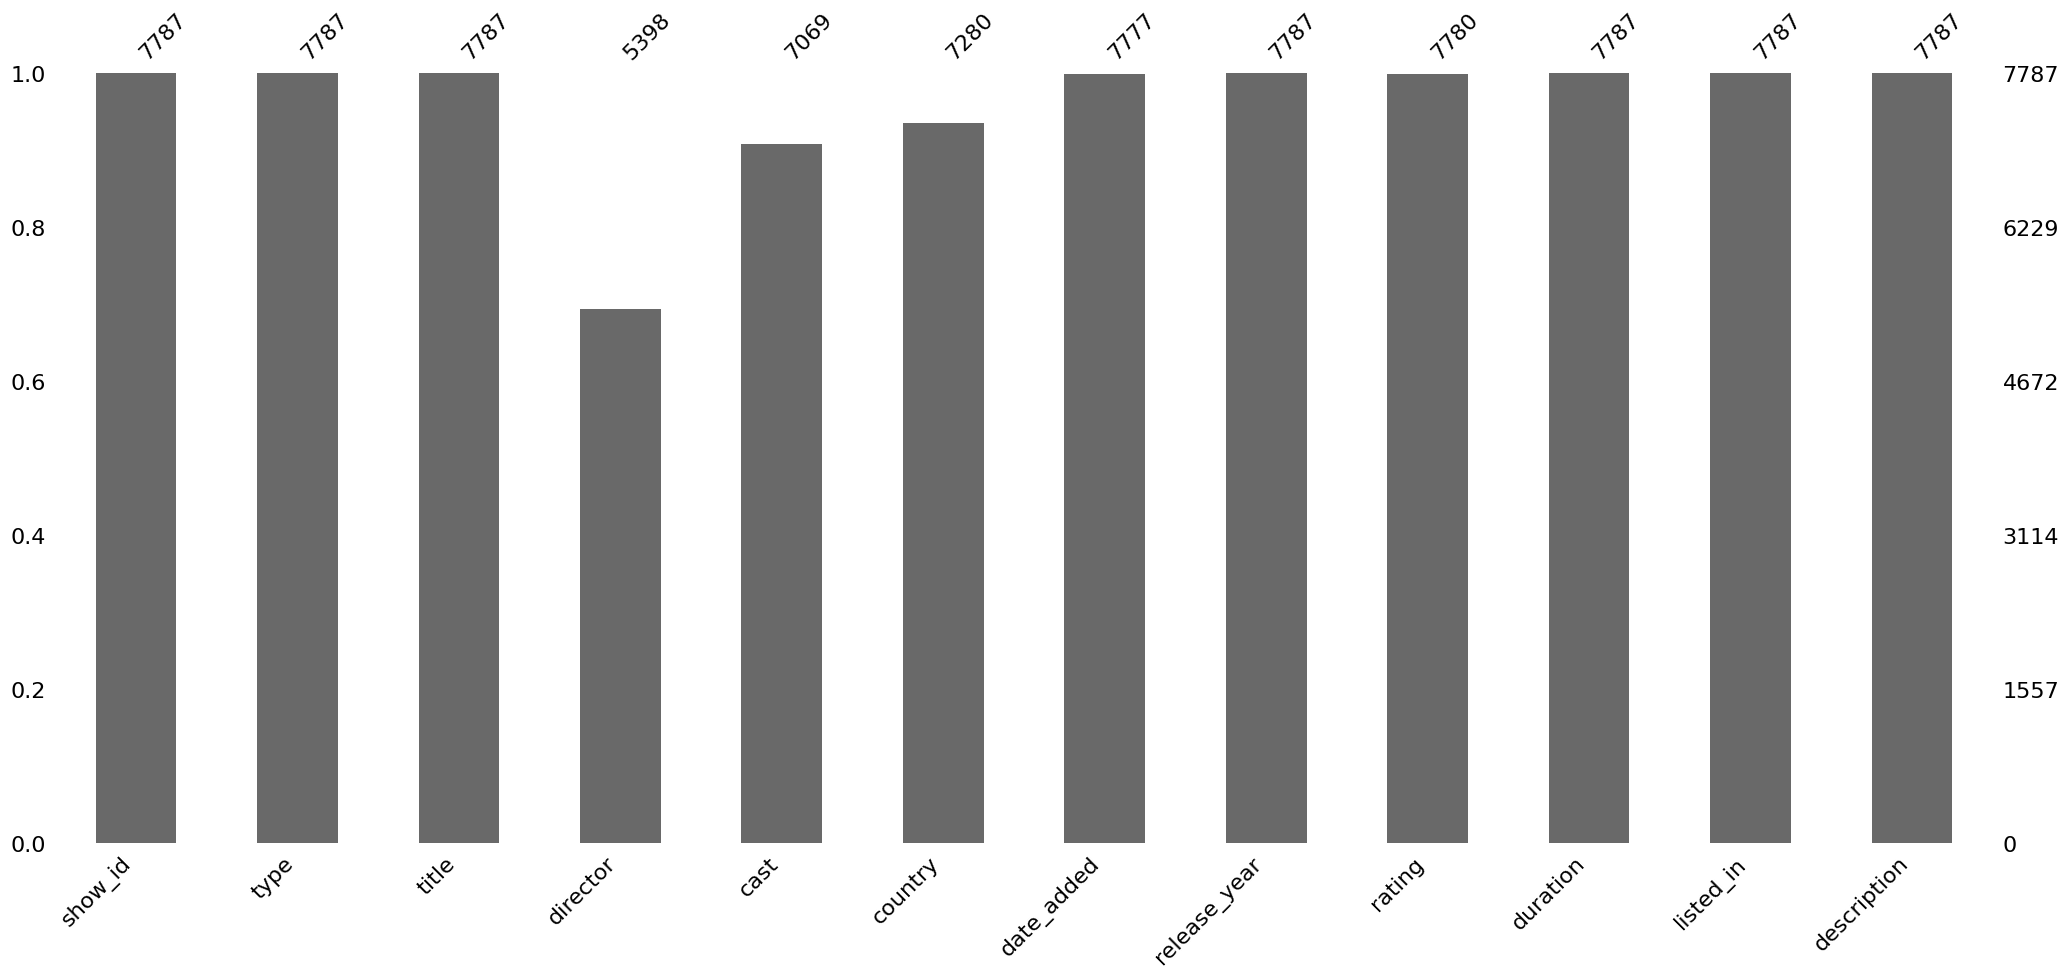

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)
plt.show()

 #### There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values

### What did you know about your dataset?

This dataset has 7787 rows and 12 columns.

Dataset is free from duplicate values.

Director column has maximum percentage of null values almost 30%, followed by cast and country columns with 9.2 and 6.7 % of null values respectively.

All columns have data of object type except release_year which is integer type, which means we have only one numerical column in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='O')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   

              country       date_added rating  duration      listed_in  \
count            7280             7777   7780      7787           7787   
unique            681             1565     14       216            492   
top     United States  January 1, 2020  TV-MA  1 Season  Documentaries   
freq             2555              118   2863      1608            334   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3

### Variables Description

**Show_id** : Unique ID for every Movie / Tv Show

**Type** : Identifier - A Movie or TV Show

**Title** : Title of the Movie / Tv Show

**Director** : Director of the Movie

**Cast** : Actors involved in the movie / show

**Country** : Country where the movie / show was produced

**Date_added** : Date it was added on Netflix

**Release_year** : Actual Releaseyear of the movie / show

**Rating** : TV Rating of the movie / show

**Duration** : Total Duration - in minutes or number of seasons

**Listed_in** : Genere

**Description**: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.to_list():
  print('unique value in',i,'is: ',df[i].nunique())

unique value in show_id is:  7787
unique value in type is:  2
unique value in title is:  7787
unique value in director is:  4049
unique value in cast is:  6831
unique value in country is:  681
unique value in date_added is:  1565
unique value in release_year is:  73
unique value in rating is:  14
unique value in duration is:  216
unique value in listed_in is:  492
unique value in description is:  7769


## 3. ***Data Wrangling***

### Data Wrangling Code

Duplicate values

In [ ]:
#checking for Duplicate values
dup_val = len(df[df.duplicated()])
print('no. of duplicate values:', dup_val)

no. of duplicate values: 0


Treating null values

In [ ]:
df['cast'].fillna(value = 'unknown', inplace = True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
# dropping null entries of date_added and rating as it's negligible
df.dropna(subset=['date_added','rating'], inplace = True)

Unique values

In [ ]:
df.nunique()

show_id         7770
type               2
title           7770
director        4047
cast            6818
country          681
date_added      1563
release_year      73
rating            14
duration         216
listed_in        491
description     7752
dtype: int64

In [ ]:
dfc = df.copy()

In [ ]:
dfc['listed_in'] =  dfc.listed_in.apply( lambda row: row.split(', '))
dfc.explode('listed_in')['listed_in'].unique()                 #list of unique genres

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [ ]:
#
changing_genres = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance',
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality',
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family',
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy',
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [ ]:
def replace_genres (row, changing_genres = changing_genres):
  empty = []

  for i in (row['listed_in']):
    if i in changing_genres:
      if '-' not in changing_genres[i]:
        empty.append(changing_genres[i])
      else:
        print(i, 'word not in dictionary')

  return(', '.join(empty))

In [ ]:
dfc['genres'] = dfc.apply( lambda row: replace_genres(row), axis=1 )
dfc['genres'] = dfc['genres'].apply( lambda row: row.split(', '))

International TV Shows word not in dictionary
International Movies word not in dictionary
International Movies word not in dictionary
Independent Movies word not in dictionary
International TV Shows word not in dictionary
International Movies word not in dictionary
International Movies word not in dictionary
International Movies word not in dictionary
International TV Shows word not in dictionary
International TV Shows word not in dictionary
International Movies word not in dictionary
Independent Movies word not in dictionary
International Movies word not in dictionary
International TV Shows word not in dictionary
Independent Movies word not in dictionary
Independent Movies word not in dictionary
International Movies word not in dictionary
International Movies word not in dictionary
International Movies word not in dictionary
International Movies word not in dictionary
International TV Shows word not in dictionary
International Movies word not in dictionary
International Movies word no

In [ ]:
dfc.explode('genres')['genres'].unique()

array(['Drama', 'SciFiFantasy', 'Horror', 'ActionAdventure', 'Mystery',
       'Thriller', 'Crime', 'Documentary', 'Sports', 'Comedy', 'Anime',
       'Reality', 'Romance', 'Science', '', 'Music', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'Classic', 'Cult', 'TalkShow',
       'Teen'], dtype=object)

In [ ]:
dfc.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...   
1                     [Dramas, International Movies]   
2              [Horror Movies, International Movies]   
3  [Action & Adventure, Independent Movies, Sci-F...   
4                                           [Dramas]   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                            genres  
0            [Drama, SciFiFantasy]  
1                          [Drama]  
2                         [Horror]  
3  [ActionAdventure, SciFiFantasy]  
4                          [Drama]

#### Converting date_added column into date format

In [ ]:
# Create new features to store date, day, month and year seperately :
# First convert date_added to date time format
dfc['date_added'] =  pd.to_datetime(dfc['date_added'])

#day added
dfc['day'] = dfc['date_added'].dt.day

#month added
dfc['month'] = dfc['date_added'].dt.month

# year added
dfc['year'] = dfc['date_added'].dt.year

#removing date_added column
dfc.drop(['date_added'], axis=1, inplace=True)

#### Fixing Rating categories

In [ ]:
#defining lemmetization
rating_conversion = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

In [ ]:
dfc['ratings'] = dfc['rating'].replace(to_replace = rating_conversion )
dfc['ratings'] = pd.Categorical(dfc['ratings'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
dfc['ratings'].unique()

['Adults', 'Teens', 'Older Kids', 'Kids']
Categories (4, object): ['Kids', 'Older Kids', 'Teens', 'Adults']

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       7770 non-null   object  
 1   type          7770 non-null   object  
 2   title         7770 non-null   object  
 3   director      5394 non-null   object  
 4   cast          7770 non-null   object  
 5   country       7770 non-null   object  
 6   release_year  7770 non-null   int64   
 7   rating        7770 non-null   object  
 8   duration      7770 non-null   object  
 9   listed_in     7770 non-null   object  
 10  description   7770 non-null   object  
 11  genres        7770 non-null   object  
 12  day           7770 non-null   int64   
 13  month         7770 non-null   int64   
 14  year          7770 non-null   int64   
 15  ratings       7770 non-null   category
dtypes: category(1), int64(4), object(11)
memory usage: 979.0+ KB


### What all manipulations have you done and insights you found?



*   Treated Null values by assigning a word and using mode function
*   Genres are extracted and re-defined accordingly. Topics like International TV Shows are removed as it could bring in a bias by displaying content in reference to American movies.
*   Date time column was converted into datetime format and information like day, month and year was extracted from it into new columns.
*   There were several categories in rating column so for better understanding we categorized it into 4 basic categories i.e., kids, older kids, teens and adults.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Univariate)

Text(0.5, 1.0, 'Movie-Series Ratio of 2019')

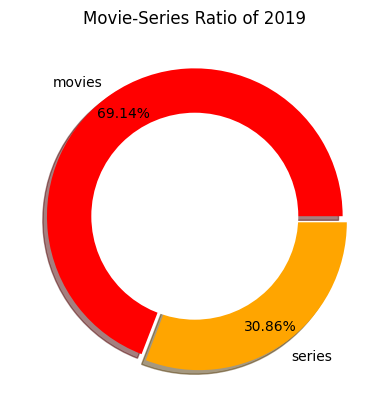

In [ ]:
# Chart - 1 visualization code
colors= ['red','orange']
temp = dfc.groupby('type')['type'].count()
plt.pie(x=temp,colors=colors, autopct='%.2f%%', pctdistance=0.85,labels=(['movies','series']),shadow=True,explode=[0,0.05])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Movie-Series Ratio of 2019')

##### 1. Why did you pick the specific chart?

Answer Here:  Donut chart is a great way to represent share of various attributes in total pool.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: There are more number of movies (70%) than TV shows (30%) on netlix dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: There are less number of TV shows available, therefore we should promote TV shows production to ensure better audience retension due to more duration and story complexity.

#### Chart - 2 (Bivariate)

<Figure size 1400x800 with 0 Axes>

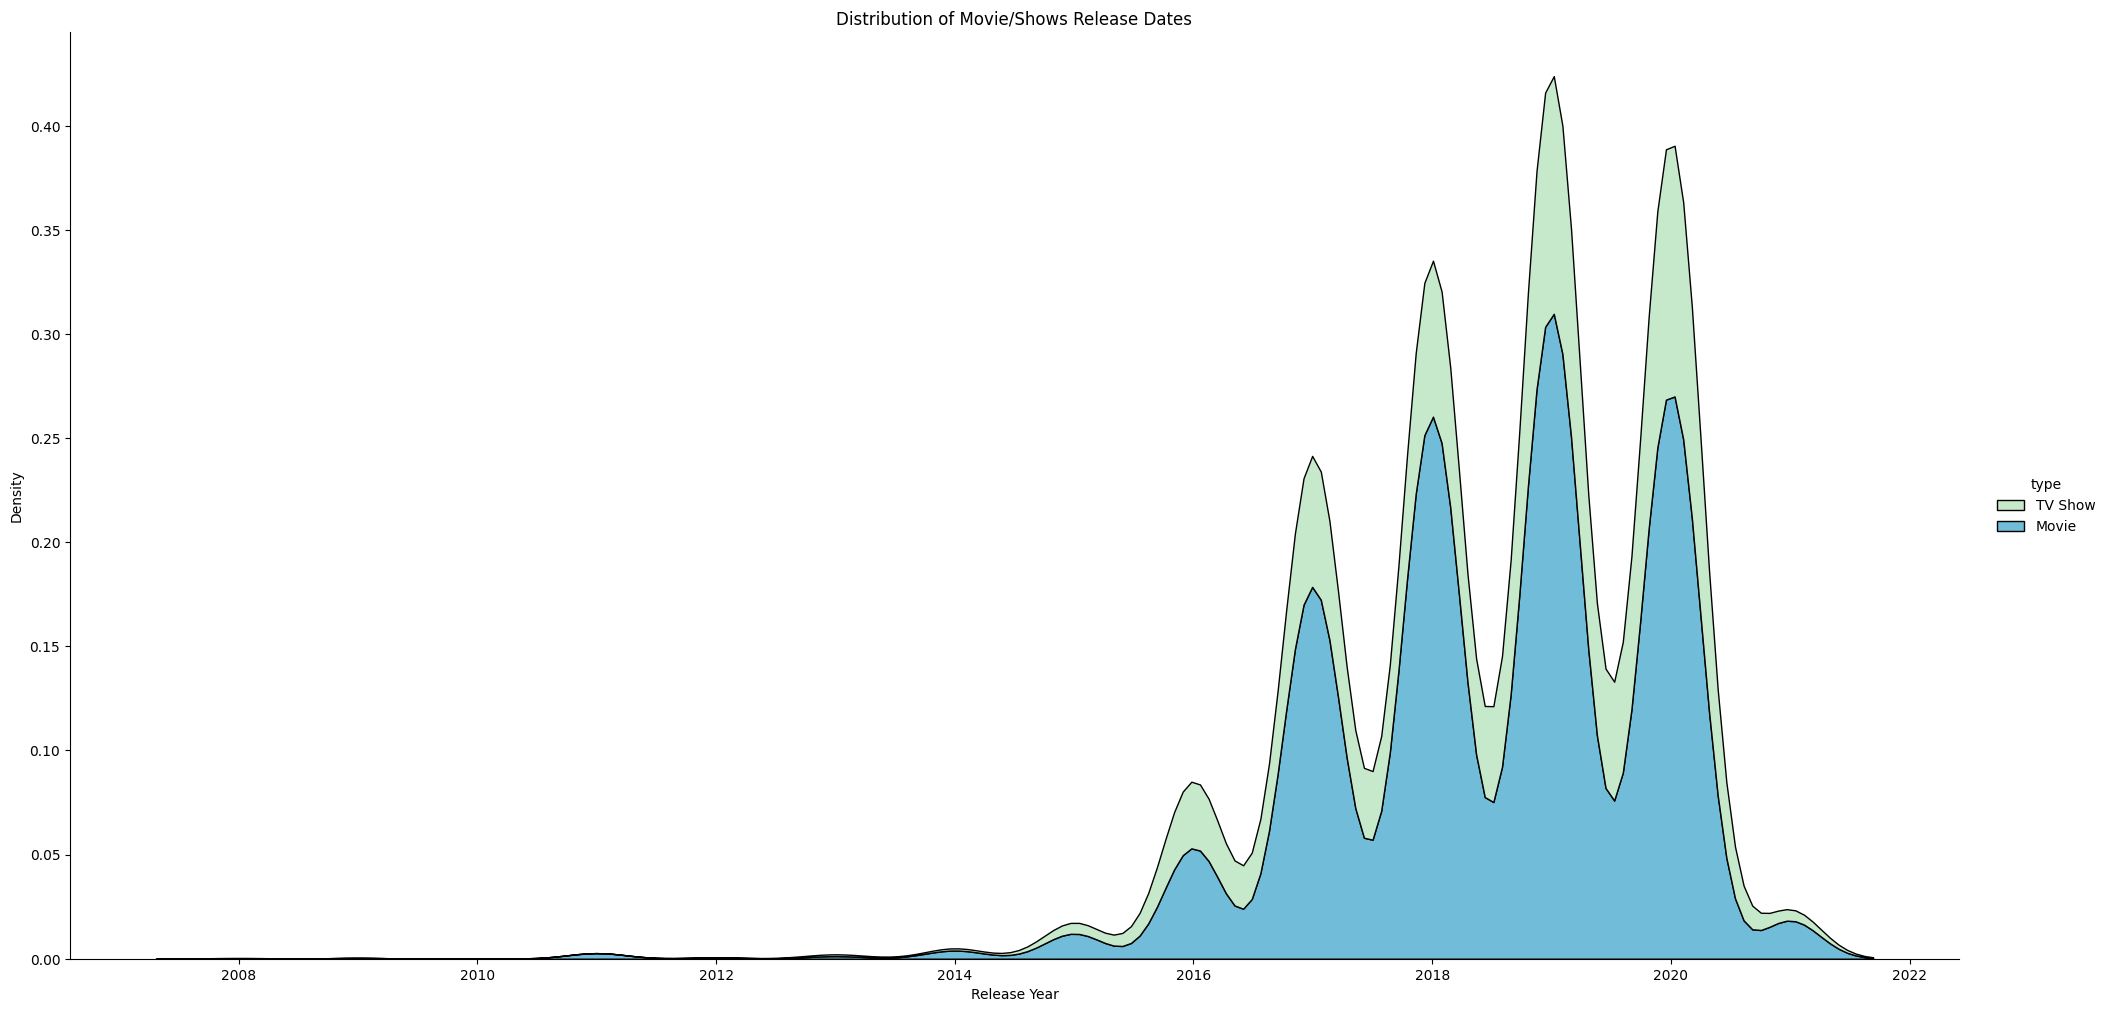

In [ ]:
# Chart - 2 visualization code

a = plt.figure(figsize=(14,8))
a = sns.displot(x='year', hue = 'type', data = dfc, kind = 'kde', height=10, aspect=2, multiple='stack', palette='GnBu')
a = plt.title('Distribution of Movie/Shows Release Dates')
a = plt.xlabel('Release Year')

##### 1. Why did you pick the specific chart?

Answer Here: I have used distibution plot with kdensity, as it's very useful to understand and compare the trends of given categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:  There is linear augmentation in the release of movies from the year 2015 with its peak in the year 2019 followed by a sudden downfall in the year 2021, which was due to covid (lockdown).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: Due to covid outbreak large number of audience is inclining towards OTT platforms than physical theatres.

#### Chart - 3 (Bivariate)

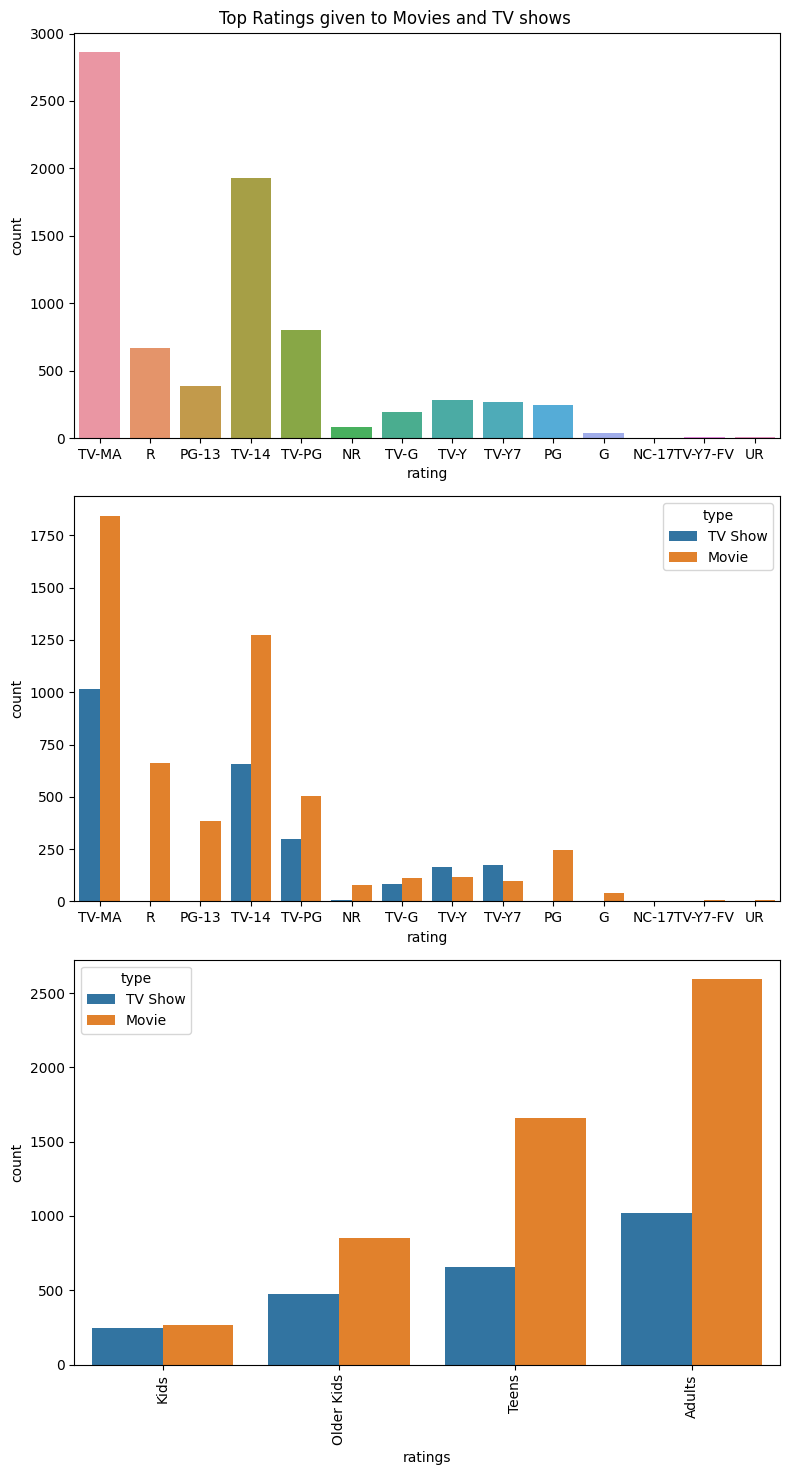

In [ ]:
# Chart - 3 visualization code
fig,ax = plt.subplots(3,1, figsize=(8,15))
plt.suptitle('Top Ratings given to Movies and TV shows')
plt.xticks(rotation=90)

graph = sns.countplot(x="rating", data=dfc, ax=ax[0])

graph = sns.countplot(x="rating", data=dfc, hue='type',ax=ax[1])

graph = sns.countplot(x="ratings", data=dfc, hue='type',ax=ax[2])

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
*   The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."

*   When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: This chart will provide the insight regarding the targeting audience, which age group has more chance of getting viewership

#### Chart - 4 (Univariate)

<Axes: xlabel='count', ylabel='genres'>

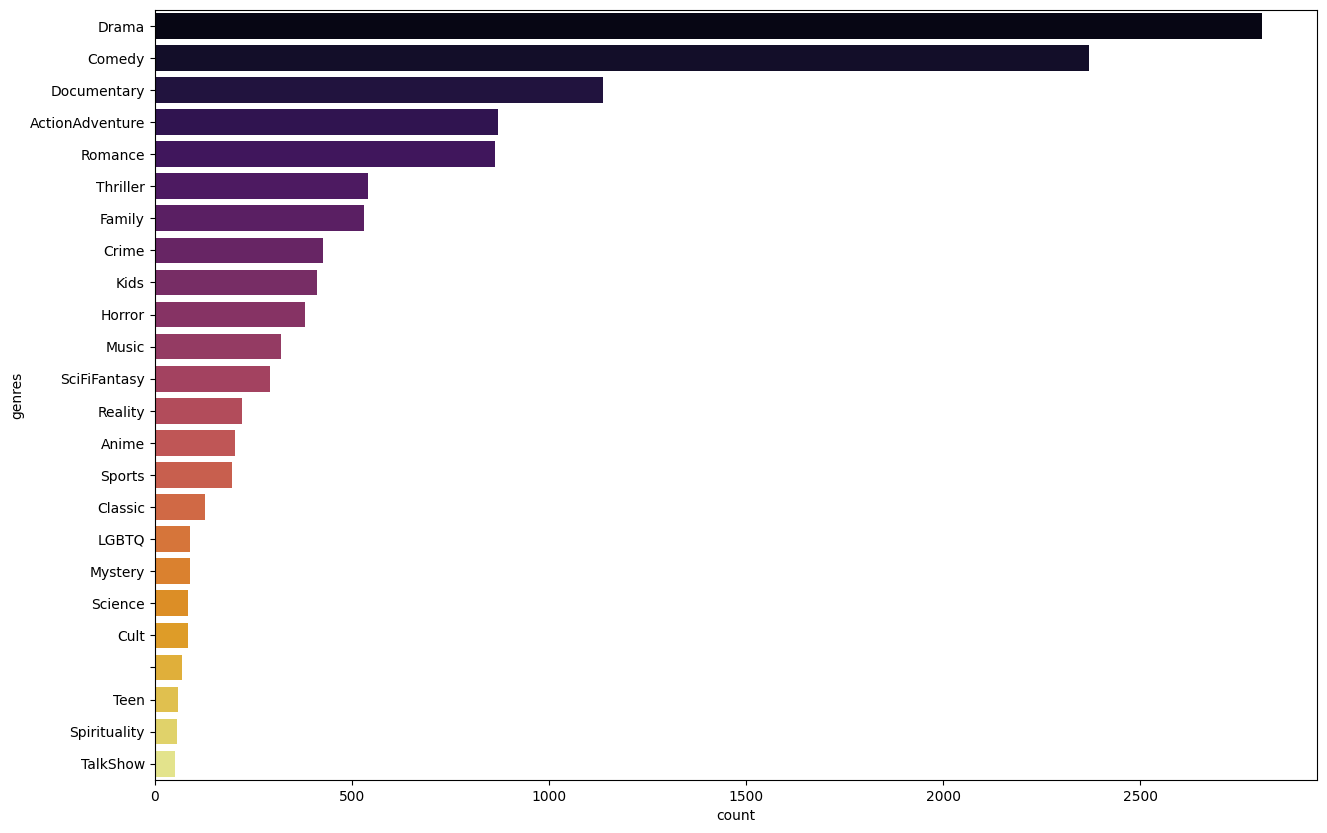

In [ ]:
# Chart - 4 visualization code
chart4 = dfc.loc[:,['show_id', 'genres']].copy()
chart4 = chart4.explode('genres')
genre_list = chart4.genres.unique()
group = chart4.groupby('genres').agg(count = ('show_id','count')).sort_values('count', ascending= False).reset_index()
plt.figure(figsize=(15,10))
sns.barplot(y = 'genres', x = 'count',data = group , palette='inferno')

In [ ]:
# to get how many genre(s) each video contains
dfc['genres'] = dfc['genres'].astype('string')
temp = []
for cat in dfc.genres.values:
  len_categories = len(cat.split(","))
  temp.append(len_categories)

In [ ]:
dfc['category'] = temp

In [ ]:
dfc['category'].value_counts()

1    3792
2    3448
3     517
4      13
Name: category, dtype: int64

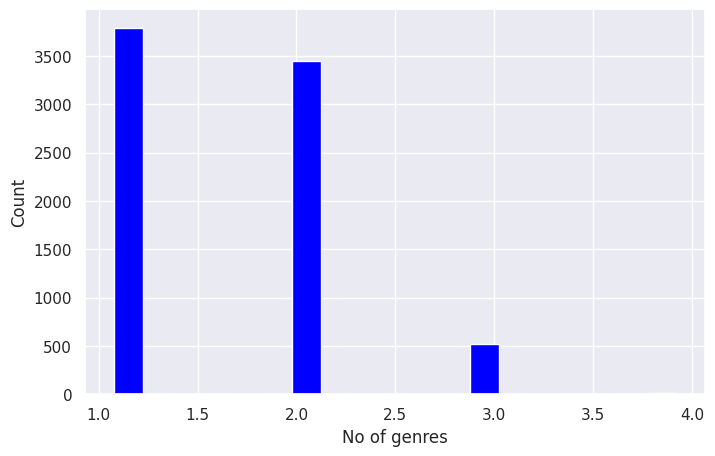

In [ ]:
#plotting graph
sns.set(style='darkgrid')
plt.figure(figsize=(8,5))
plt.hist(dfc.category , range = (1 ,4) , rwidth = 0.5, color ='blue')
plt.xlabel("No of genres")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:: I have used bar charts to represent dependent variable ditribution, Bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:


*   Drama,Comedy,documentry are among top most genres on netflix
*   Most of the content on netflix contains 1 or 2 genres



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: there are many genres which needs to be promoted, and  to play on  the safer side can make content based on multiple genres rather than just 1 or 2.

#### Chart - 5 (Univariate)

In [ ]:
#seperating tv shows and movies in different varibles
tv_shows = dfc[dfc['type']=='TV Show']
movie = dfc[dfc['type']=='Movie']

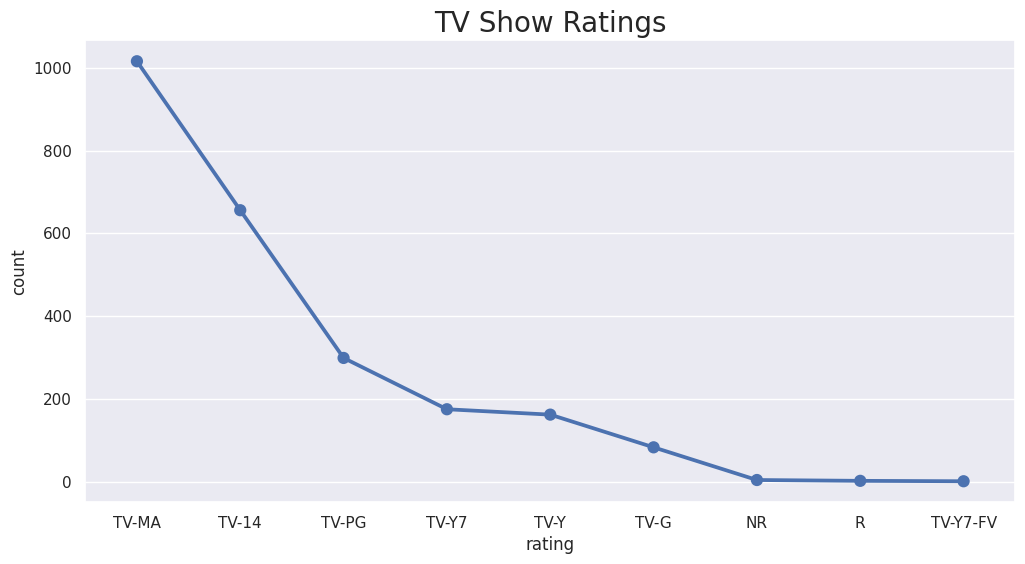

In [ ]:
chart5a = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=chart5a)
plt.title('TV Show Ratings',size='20')
plt.show()

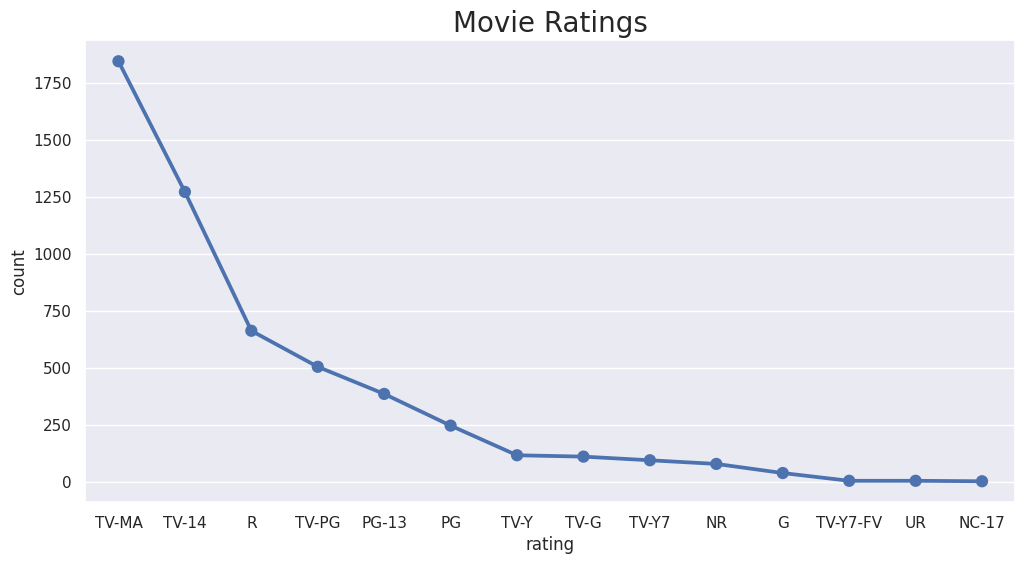

In [ ]:
chart5b = movie.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=chart5b)
plt.title('Movie Ratings',size='20')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: line chart is best suitable for comparing the trend analysis of variables

##### 2. What is/are the insight(s) found from the chart?

Answer Here:

Most of the contents got ratings like

- TV-MA (For Mature Audiences)

- TV-14 ( May be unsuitable for children under 14 )

- TV-PG ( Parental Guidance Suggested )


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: it's better to stick with mature audience content then for older kids, kids then so on


#### Chart -6 (Univariate)

In [ ]:
# duration manipulation for movie
movie.duration = movie.duration.str.replace(' min','').astype(int)

# duration manipulation for tv shows
tv_shows.rename(columns={'duration':'seasons'}, inplace=True)
tv_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
tv_shows.seasons = tv_shows.seasons.str.replace(' Seasons','').astype(int)

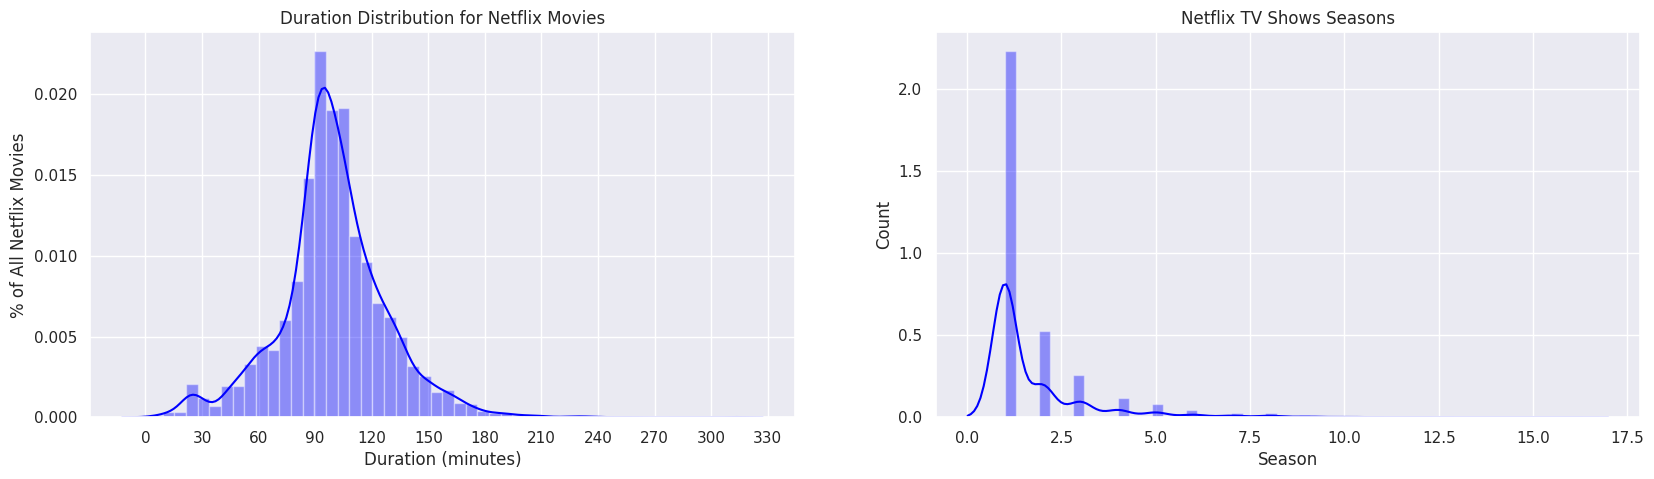

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
chart6a = sns.distplot(movie.duration, color='blue',ax=ax[0]);
chart6a.set_xticks(np.arange(0,360,30))
chart6a.set_title("Duration Distribution for Netflix Movies")
chart6a.set_ylabel("% of All Netflix Movies")
chart6a.set_xlabel("Duration (minutes)")

chart6b = sns.distplot(tv_shows.seasons, color='blue',ax=ax[1]);
chart6b.set_title("Netflix TV Shows Seasons")
chart6b.set_ylabel("Count")
chart6b.set_xlabel("Season")
fig.show()

#### Chart - 7 (Univariate)

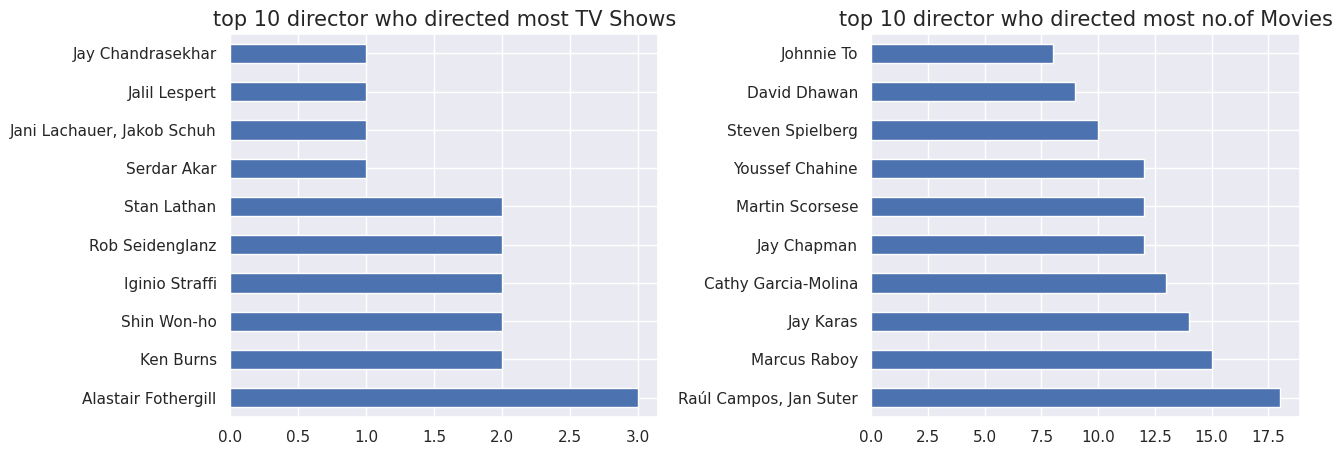

In [ ]:
# Chart - 6 visualization code
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed most no. of TV shows
chart6a= tv_shows['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
chart6a.set_title('top 10 director who directed most TV Shows', size=15)

# top 10 directors who directed most no. of Movies
chart6b= movie['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
chart6b.set_title('top 10 director who directed most no.of Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: I have used bar charts to represent dependent variable ditribution, horizontal bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:


*   Alastair Forthergill claims most directed series
*   Jan suter and Raul Campos are the leading directors for movie direction, with abundant experience.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: It will be better to cast popular actors as they have huge fanbase and better experience.

#### Chart - 8 (Univariate)

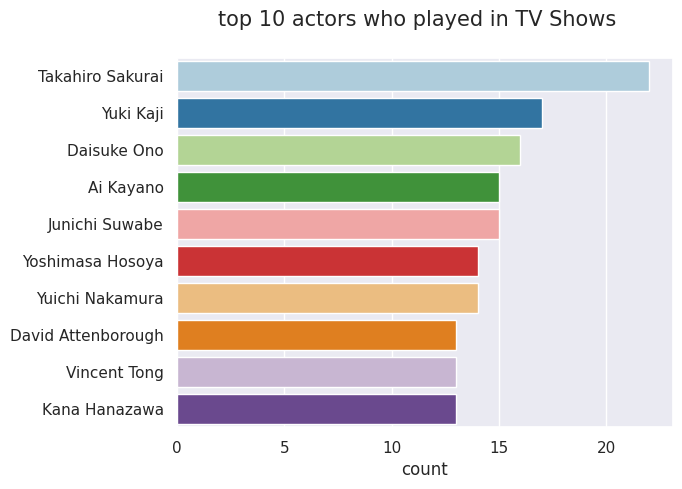

In [ ]:
# Chart - 7 visualization code
chart7a = tv_shows[tv_shows.cast != 'unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = chart7a, order=chart7a.value_counts().index[:10], palette='Paired')
plt.suptitle('top 10 actors who played in TV Shows', size=15)
plt.show()

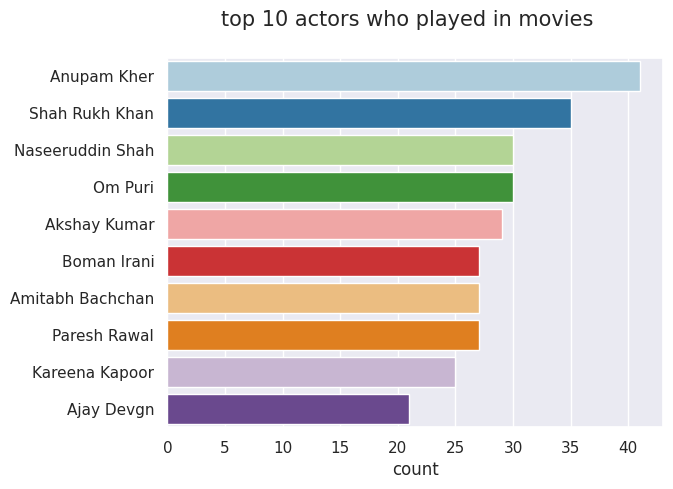

In [ ]:
chart7b = movie[movie.cast != 'unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = chart7b, order=chart7b.value_counts().index[:10], palette='Paired')
plt.suptitle('top 10 actors who played in movies', size=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: I  have used bar charts to represent dependent variable ditribution, horizontal bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.


##### 2. What is/are the insight(s) found from the chart?

Answer Here:


*   Takahiro Sakurai most casted actor for TV shows
*   Anupam kher most casted actor for movies


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: combining most casted actors and directors will increase the chances of success

#### Chart - 9 (Bivariate)

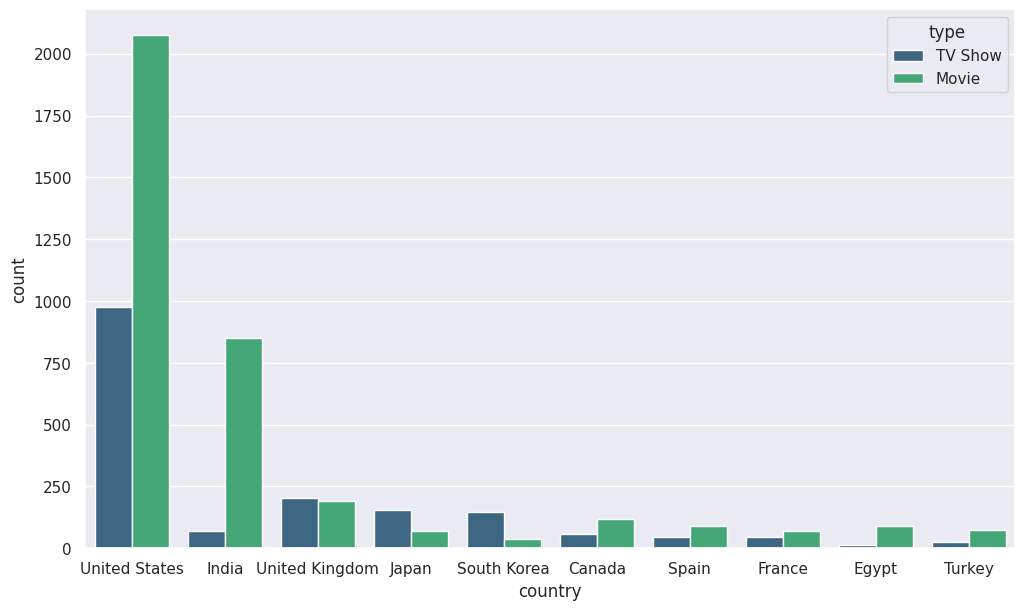

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(12,7))
sns.countplot(x=dfc['country'],order=dfc['country'].value_counts().index[0:10],hue=dfc['type'],palette= 'viridis')
plt.show()

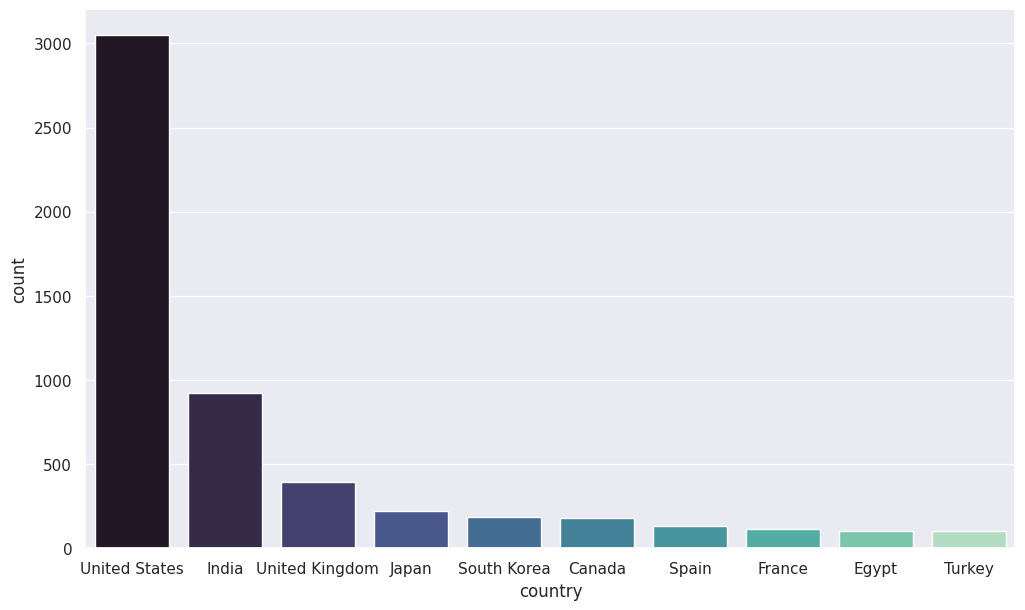

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x=dfc['country'],order=dfc['country'].value_counts().index[0:10],palette= 'mako')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: I have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:

-The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.

-In India and United State, a greater number of movies are present compared to TV shows.

-In the UK, Japan, and South Korea there are a greater number of TV shows than movies

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: According to the trend a country shows, a country should produce content.

#### Chart - 10 (Univariate)

Text(0.5, 0, 'In months added ')

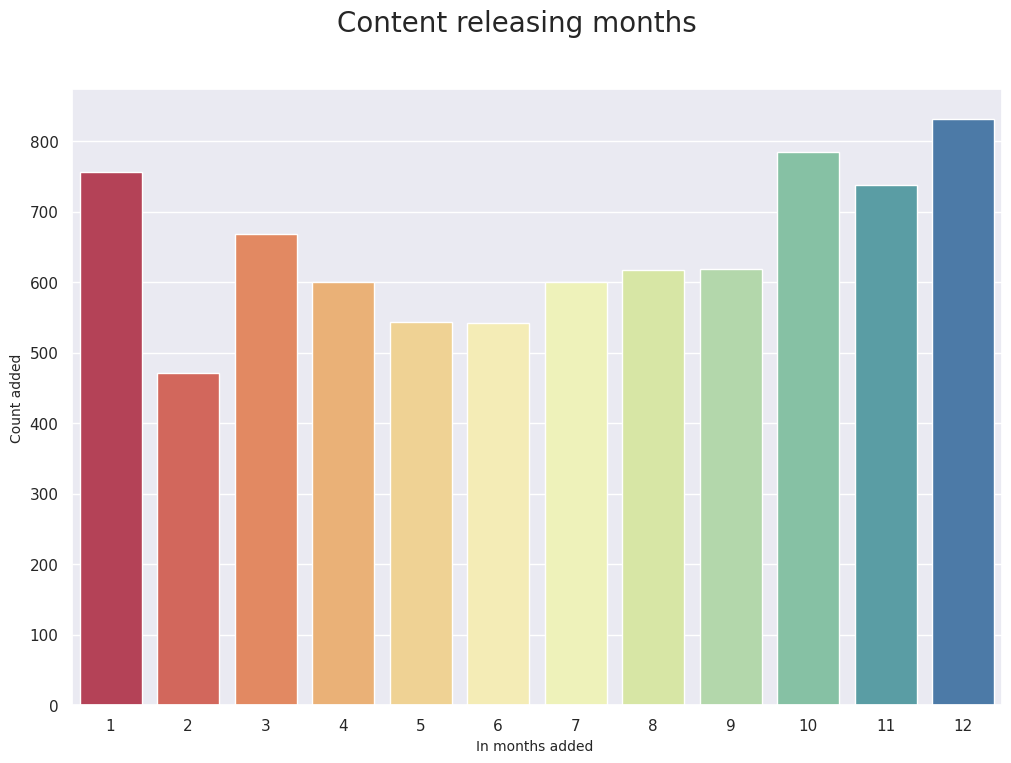

In [ ]:
# Chart - 9 visualization code
fig = plt.figure(figsize=(12,8))
sns.countplot(data=dfc,x = 'month',palette ="Spectral")
plt.suptitle('Content releasing months ', fontsize=20)
plt.ylabel('Count added', fontsize=10)
plt.xlabel('In months added ', fontsize=10)


##### 1. Why did you pick the specific chart?

Answer Here: I have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: Most of the movies were found to be released in the month of october, november, december and january.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:  There is wide gap in new content release in mid year, so this can be filled.

#### Chart - 11 (Univariate)

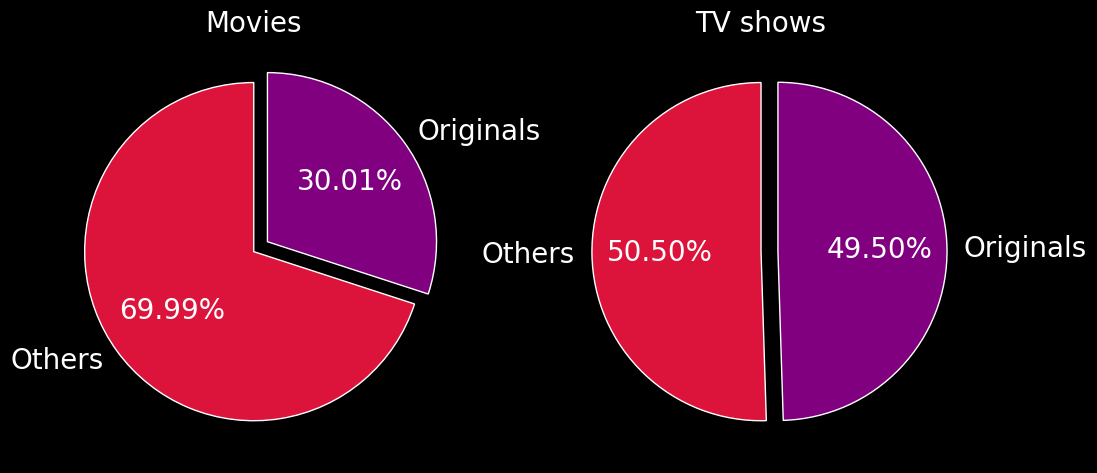

In [ ]:
# Chart - 10 visualization code
movie['originals'] = np.where(movie['release_year'] == movie['year'], 'Yes', 'No')

# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(12,6),facecolor="black")
explode = (0, 0.1)
ax[0].set_title('Movies', color='white', fontsize = 20)
ax[0].pie(movie['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
        startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['crimson','purple'])

# pie plot showing percentage of originals and others in TV_shows
tv_shows['originals'] = np.where(tv_shows['release_year'] == tv_shows['year'], 'Yes', 'No')
ax[1].set_title('TV shows', color='white', fontsize = 20 )
ax[1].pie(tv_shows['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['crimson','purple'])

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: I have used pie chart to present education column, Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: Movies:
 - 30% of the movies are netflix originals and remaining 70% movies are added on netflix which were released by different modes.

- TV shows: 50% of the TV shows are netflix originals and remaining 50% TV shows are added on netflix which were released by different modes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: We can add more number of netflix original movies.

#### Chart - 12 (Univariate)

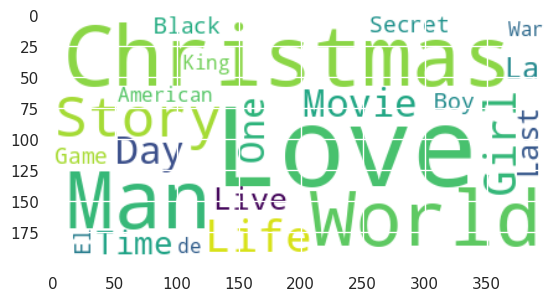

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Chart - 11 visualization code
#importing wordcloud lib
from wordcloud import WordCloud, STOPWORDS

dfc['title'].nunique()

# text documents
text = " ".join(word for word in dfc['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.figure(figsize=(12,6))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: a wordcloud chart is best suitable for knowing the most frequent words

##### 2. What is/are the insight(s) found from the chart?

Answer Here: The most frequently used words in the description column are "family," "find," "life," "love," "new world," and "friend."

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: A catch-y name of a movie or a show can also make viewer to watch it.  

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   H0 Hypothesis : Movies for kids and older kids are two hours long.
*   H1 Hypothesis : Movies for kids and older kids are not two hours long.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Making copy of df_clean_frame
hypothesis=dfc.copy()
hypothesis = hypothesis[hypothesis["type"] == "Movie"]
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
hypothesis['target_ages'] = hypothesis['rating'].replace(ratings_ages)
# Let's see unique target ages
hypothesis['target_ages'].unique()
hypothesis['target_ages'] = pd.Categorical(hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
# From duration feature extractin string part and after extracting Changing the object type to numeric
hypothesis['duration']= hypothesis['duration'].str.extract('(\d+)')
hypothesis['duration'] = pd.to_numeric(hypothesis['duration'])
# Head of df_
hypothesis.head(3)
# Group_by duration and target_ages
group_by_= hypothesis[['duration','target_ages']].groupby(by='target_ages')
# Mean of group_by variable
group=group_by_.mean().reset_index()
group
# In A and B variable grouping values
one = group_by_.get_group('Kids')
two = group_by_.get_group('Older Kids')
# Mean and std. calutation for kids and older kids variables
Mean1 = one.mean()
SD1 = one.std()

Mean2= two.mean()
SD2 = two.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(Mean1,Mean2))
print('Std deviation for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(SD2,SD1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std deviation for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [ ]:
# Perform Statistical Test to obtain P-Value
# Import stats
from scipy import stats
# Length of groups and DOF
len1 = len(one)
len2= len(two)
print(len1,len2)

dof = len1+len2-2
print('dof',dof)

sp_2 = ((len2-1)*SD1**2  + (len1-1)*SD2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t-value
t_value = (Mean1-Mean2)/(sp * np.sqrt(1/len1 + 1/len2))
print('t-value',t_value[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
t-value -11.51992627853396


In [ ]:
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
  stats.t.ppf(0.975,dof)

1.9620900365868947

##### Which statistical test have you done to obtain P-Value?

T-Test

##### Why did you choose the specific statistical test?

A t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis(H0) - The Country is independent of Target_ages.

- Alternative Hypothesis(H1) - The Country is associated with Target_ages.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
cont_table  = pd.crosstab(hypothesis.country, hypothesis.target_ages)
cont_table

target_ages                                         Kids  Older Kids  Teens  \
country                                                                       
Argentina                                              1           2      5   
Argentina, Brazil, France, Poland, Germany, Den...     0           0      1   
Argentina, Chile                                       0           0      1   
Argentina, Chile, Peru                                 0           0      0   
Argentina, France                                      0           0      0   
...                                                  ...         ...    ...   
Venezuela                                              0           0      1   
Venezuela, Colombia                                    0           0      0   
Vietnam                                                1           0      2   
West Germany                                           0           0      0   
Zimbabwe                                               1           0      0   

target_ages                                         Adults  
country                                                     
Argentina                                               26  
Argentina, Brazil, France, Poland, Germany, Den...       0  
Argentina, Chile                                         0  
Argentina, Chile, Peru                                   1  
Argentina, France                                        1  
...                                                    ...  
Venezuela                                                0  
Venezuela, Colombia                                      1  
Vietnam                                                  2  
West Germany                                             1  
Zimbabwe                                                 0  

[590 rows x 4 columns]

In [ ]:
from scipy.stats import chi2_contingency
X2, p_value, degree_freedom, expected_values = chi2_contingency(cont_table, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value))

X2: 2441.9237743926055, P-Value: 1.2917652764153065e-24


##### Which statistical test have you done to obtain P-Value?

 Chi Square Test

##### Why did you choose the specific statistical test?

A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis(H0) - The Duration is independent of Target_ages.

- Alternative Hypothesis(H1) - The Duration is associated with Target_ages.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
cont_table_1  = pd.crosstab(hypothesis.target_ages, hypothesis.duration)
cont_table_1

duration     3    5    8    9    10   11   12   13   14   15   ...  208  209  \
target_ages                                                    ...             
Kids           1    0    0    1    1    2    0    0    0    0  ...    0    0   
Older Kids     0    0    0    0    0    0    1    1    1    2  ...    0    0   
Teens          0    1    1    0    0    0    0    0    2    0  ...    0    1   
Adults         0    0    0    0    0    0    1    0    0    0  ...    1    1   

duration     214  224  228  230  233  237  253  312  
target_ages                                          
Kids           0    0    0    0    0    0    0    0  
Older Kids     0    1    0    0    1    0    0    0  
Teens          1    0    1    1    0    1    1    0  
Adults         0    0    0    0    0    0    0    1  

[4 rows x 201 columns]

In [ ]:
from scipy.stats import chi2_contingency
X2, p_value, degree_freedom, expected_values = chi2_contingency(cont_table_1, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value))

X2: 1942.6913060752477, P-Value: 3.3536893054183175e-141


##### Which statistical test have you done to obtain P-Value?

Chi Square test

##### Why did you choose the specific statistical test?

 A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
dfc.isna().sum()

show_id            0
type               0
title              0
director        2376
cast               0
country            0
release_year       0
rating             0
duration           0
listed_in          0
description        0
genres             0
day                0
month              0
year               0
ratings            0
category           0
dtype: int64

In [ ]:
#handling missing values in column director
dfc['director'].fillna(value = 'unknown', inplace = True)
dfc.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
genres          0
day             0
month           0
year            0
ratings         0
category        0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Director and cast columns with maximum nnumber of null values cannot be replaced with mode therefore we have replaced them with "unknown".

### 2. Handling Outliers

<Axes: >

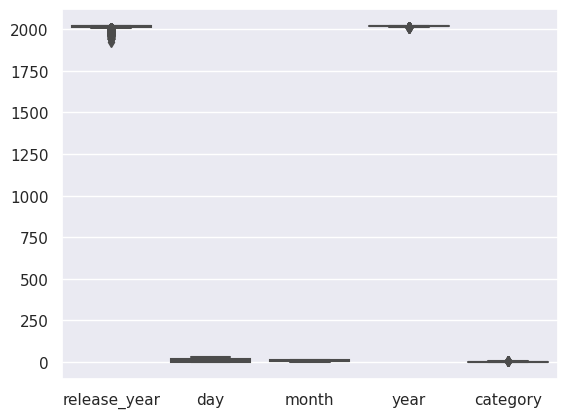

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=dfc)

##### What all outlier treatment techniques have you used and why did you use those techniques?

There was no need to treat outlier, as outliers weren't in significant quantity  

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
dfc.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                           listed_in  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...   
1                     [Dramas, International Movies]   
2              [Horror Movies, International Movies]   
3  [Action & Adventure, Independent Movies, Sci-F...   
4                                           [Dramas]   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                genres  day  month  year ratings  category  
0            ['Drama', 'SciFiFantasy']   14      8  2020  Adults         2  
1                            ['Drama']   23     12  2016  Adults         1  
2                           ['Horror']   20     12  2018  Adults         1  
3  ['ActionAdventure', 'SciFiFantasy']   16     11  2017   Teens         2  
4                            ['Drama']    1      1  2020   Teens         1

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# selecting attributes
dfc['clustered'] =dfc['description'] + dfc['country'] + dfc['rating'] + dfc['director'] + dfc['cast']

In [ ]:
dfc['clustered'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.BrazilTV-MAunknownJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'

#### 2. Lower Casing

In [ ]:
 # Lower Casing
 dfc['clustered'] = dfc['clustered'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
#function to remove punctuation
def remove_punctuation(text):
    import string
    translator = str.maketrans('','', string.punctuation)
    return text.translate(translator)

#updating data of column
dfc['clustered'] = dfc['clustered'].apply(remove_punctuation)
dfc.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                           listed_in  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...   
1                     [Dramas, International Movies]   
2              [Horror Movies, International Movies]   
3  [Action & Adventure, Independent Movies, Sci-F...   
4                                           [Dramas]   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                genres  day  month  year ratings  category  \
0            ['Drama', 'SciFiFantasy']   14      8  2020  Adults         2   
1                            ['Drama']   23     12  2016  Adults         1   
2                           ['Horror']   20     12  2018  Adults         1   
3  ['ActionAdventure', 'SciFiFantasy']   16     11  2017   Teens         2   
4                            ['Drama']    1      1  2020   Teens         1   

                                           clustered  Length(genres)  \
0  in a future where the elite inhabit an island ...              25   
1  after a devastating earthquake hits mexico cit...               9   
2  when an army recruit is found dead his fellow ...              10   
3  in a postapocalyptic world ragdoll robots hide...              35   
4  a brilliant group of students become cardcount...               9   

   Length(clustered)  
0                259  
1                202  
2                226  
3                245  
4                275

#### 4. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words=stopwords.words('english')

#function to remove stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

#updating data of column
dfc['clustered'] = dfc['clustered'].apply(stopwords)
dfc['clustered'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: clustered, dtype: object

#### 5. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem.snowball import SnowballStemmer

stemmer =SnowballStemmer("english")

#function for stemming
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
dfc['clustered'] = dfc['clustered'].apply(stemming)
dfc['clustered'].head()

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
Name: clustered, dtype: object

##### Which text normalization technique have you used and why?

Stemming, to reduce the words to their base form.

#### 6. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

dfc['clustered'] = dfc['clustered'].fillna('')
tfidf = TfidfVectorizer(stop_words='english')

#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(dfc['clustered'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7770, 53966)

##### Which text vectorization technique have you used and why?

TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions all that while considering the frequancy of each word in the document.

#### 7. Data Scaling

In [ ]:
# importing lib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm

In [ ]:
# Scaling your data using standardscaler
dfc['Length(genres)'] = dfc['genres'].apply(lambda x: len(x))
dfc['Length(clustered)'] = dfc['clustered'].apply(lambda x: len(x))

# processing Standardscaler
X_features = dfc[['Length(clustered)','Length(genres)']]
stdscaler = preprocessing.StandardScaler()
X_features.describe()

Length(clustered)  Length(genres)
count        7770.000000     7770.000000
mean          218.973488       17.468082
std            68.613697        7.947574
min            74.000000        4.000000
25%           166.000000       10.000000
50%           221.000000       18.000000
75%           258.000000       21.000000
max           814.000000       54.000000

In [ ]:
# Scaling your data
X_rescale=stdscaler.fit_transform(X_features)
X = X_rescale
silhouette_score_ = []
range_n_clusters = [i for i in range(2,16)]

In [ ]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

# silhouette score
    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.36838618634420095
For n_clusters = 3, silhouette score is 0.3660913799034134
For n_clusters = 4, silhouette score is 0.414053097956093
For n_clusters = 5, silhouette score is 0.4340504946520426
For n_clusters = 6, silhouette score is 0.4627759054754217
For n_clusters = 7, silhouette score is 0.4654227739791402
For n_clusters = 8, silhouette score is 0.448077082761195
For n_clusters = 9, silhouette score is 0.4592299971864082
For n_clusters = 10, silhouette score is 0.44712696696251647
For n_clusters = 11, silhouette score is 0.4539052044178058
For n_clusters = 12, silhouette score is 0.4547299650886557
For n_clusters = 13, silhouette score is 0.45416943903731327
For n_clusters = 14, silhouette score is 0.4533117826887413
For n_clusters = 15, silhouette score is 0.443664722700797


##### Which method have you used to scale you data and why?

Standardscaler transformation, As it standardize each feature column

#### 8. Dimesionality Reduction

In [ ]:
# DImensionality Reduction (If needed)
#principal component analysis
pca = PCA(random_state=12)
pca.fit(X)

PCA(random_state=12)

Text(0, 0.5, 'cumulative explained variance')

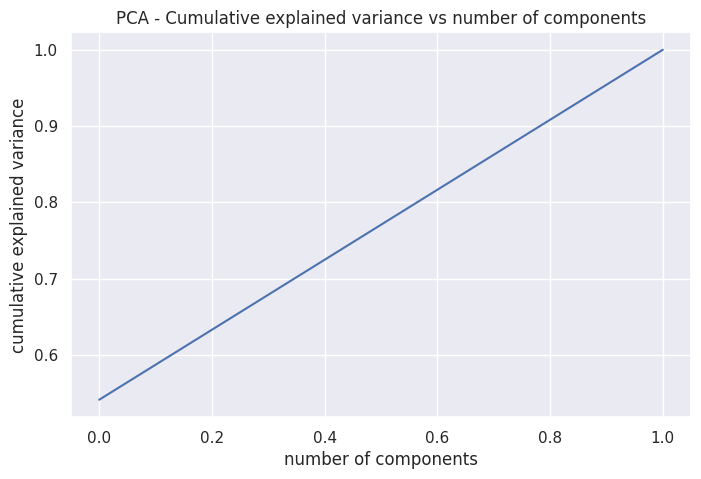

In [ ]:
#plotting the chart
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# Reducing the dimensions using pca
pca = PCA(n_components=2,random_state=12)
pca.fit(X)
x_pca = pca.transform(X)

In [ ]:
x_pca.shape

(7770, 2)

##### Do you think that dimensionality reduction is needed? Explain Why?

  Dimension reduction is very important as
  
- Fewer features mean less complexity.

-  You will need less storage space because you have fewer data.

- Fewer features require less computation time.

- Model accuracy improves due to less misleading data.

- Algorithms train faster thanks to fewer data.

- Reducing the data set’s feature dimensions helps visualize the data faster.

- It removes noise and redundant features.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used Principle Component Analysis as the key aim of PCA is to reduce the number of variables of a data set, while preserving as much information as possible.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
k_clusters = 4
# Fit the Algorithm
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
model.fit(X)
# Predict on the model
clusters = model.predict(X)

In [ ]:
# Evaluate the silhouette score :
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.4141311109643918


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

For n_clusters = 2 The average silhouette_score is : 0.36831744518325743
For n_clusters = 3 The average silhouette_score is : 0.36575212101407617
For n_clusters = 4 The average silhouette_score is : 0.35945857682682414
For n_clusters = 5 The average silhouette_score is : 0.4340755677290694
For n_clusters = 6 The average silhouette_score is : 0.4631406053530051
For n_clusters = 7 The average silhouette_score is : 0.46626542016311234
For n_clusters = 8 The average silhouette_score is : 0.448077082761195
For n_clusters = 9 The average silhouette_score is : 0.4584810501171327
For n_clusters = 10 The average silhouette_score is : 0.447129545889344
For n_clusters = 11 The average silhouette_score is : 0.45339507838308885
For n_clusters = 12 The average silhouette_score is : 0.4558404830458584
For n_clusters = 13 The average silhouette_score is : 0.4531479368526967
For n_clusters = 14 The average silhouette_score is : 0.4524290738300868
For n_clusters = 15 The average silhouette_score is : 0.

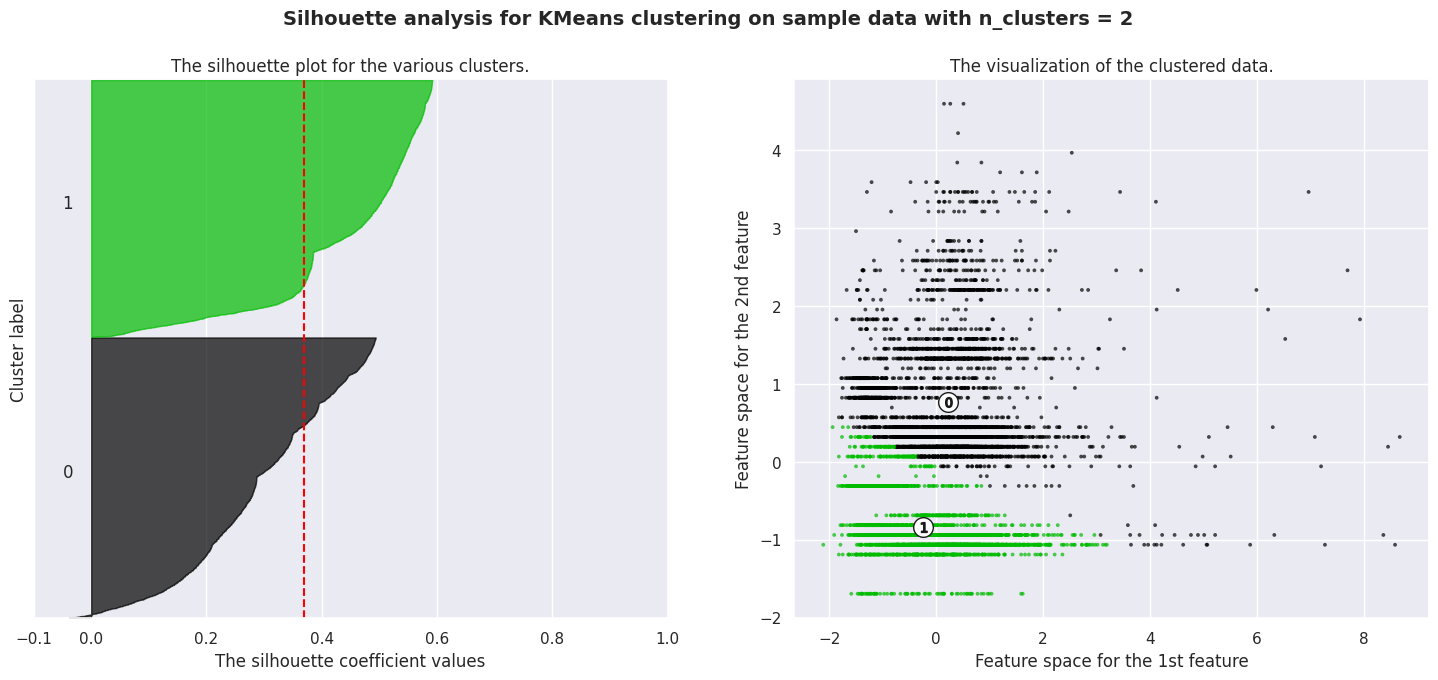

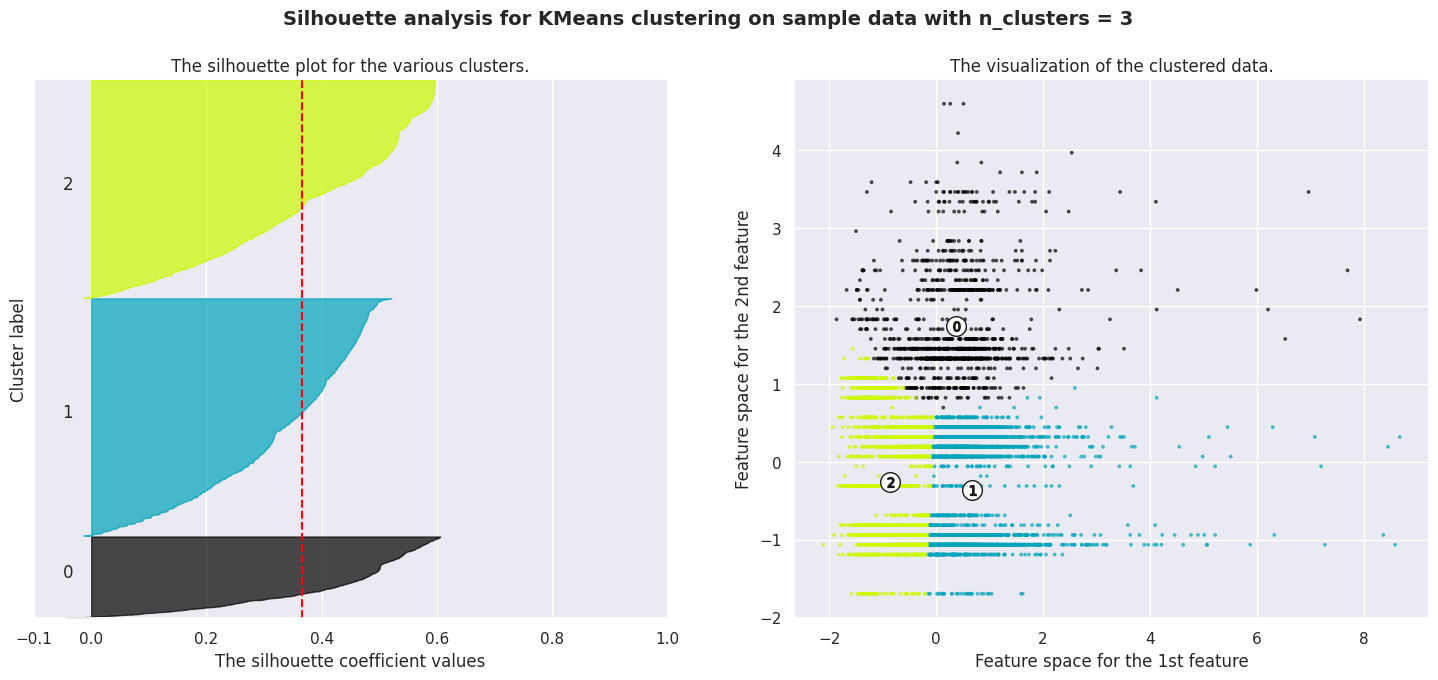

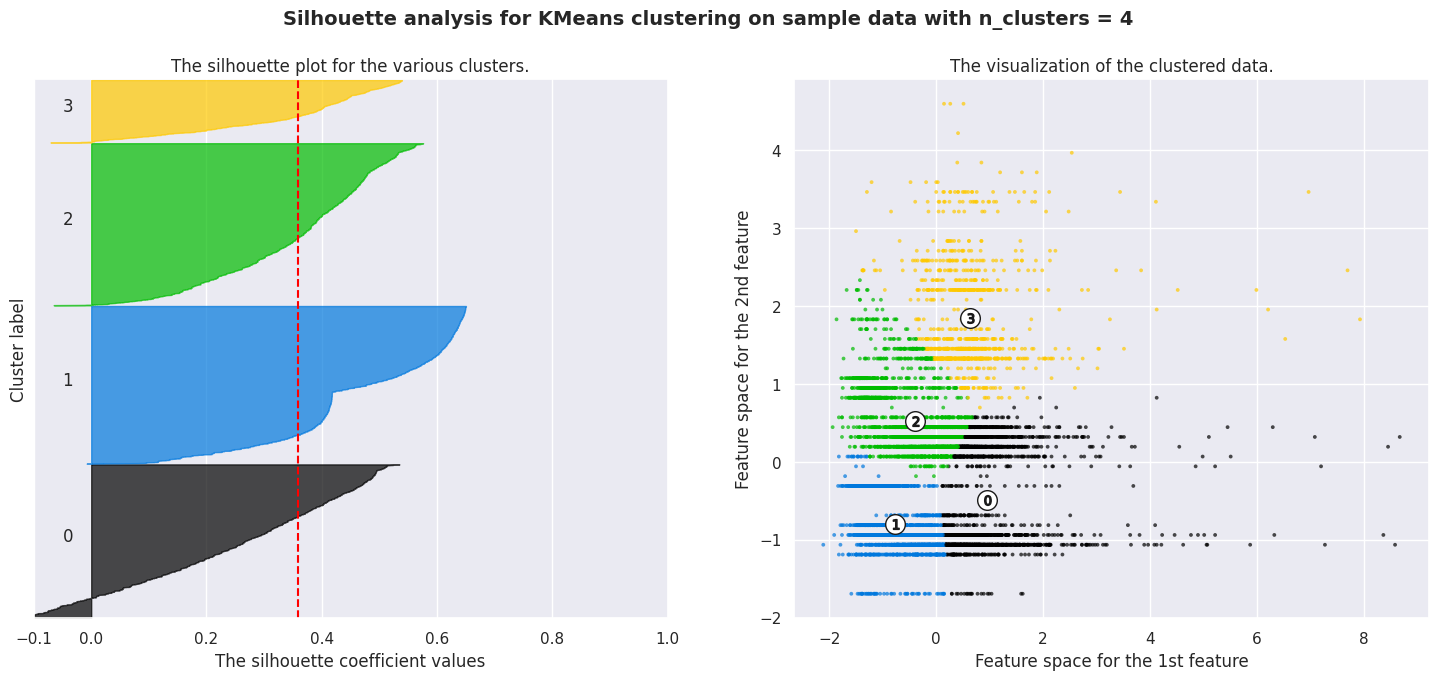

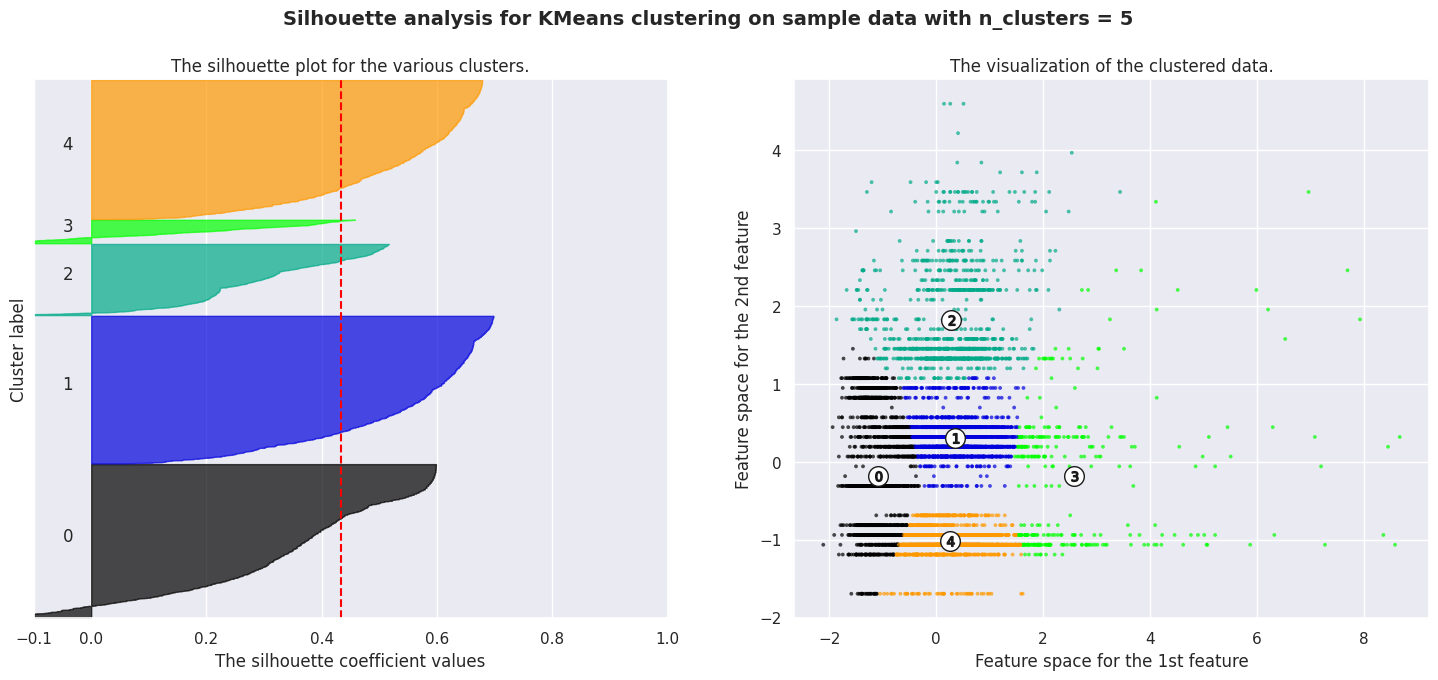

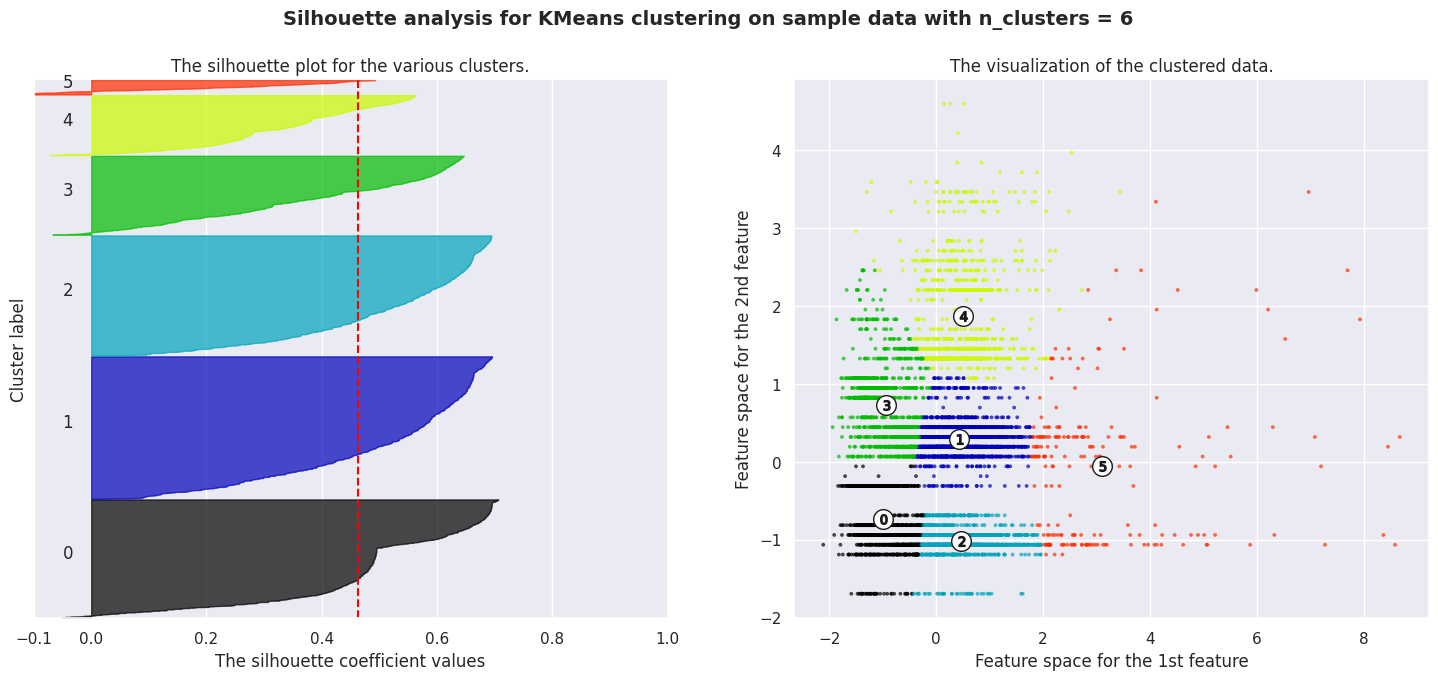

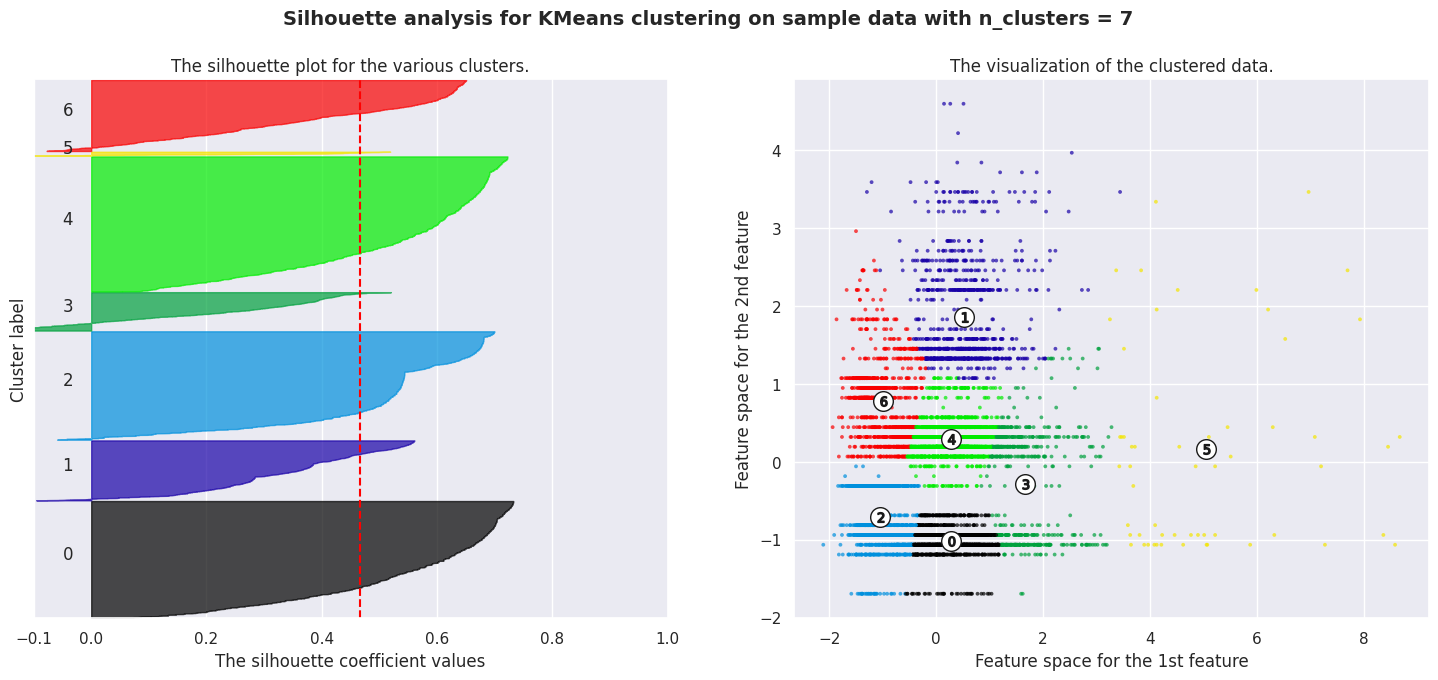

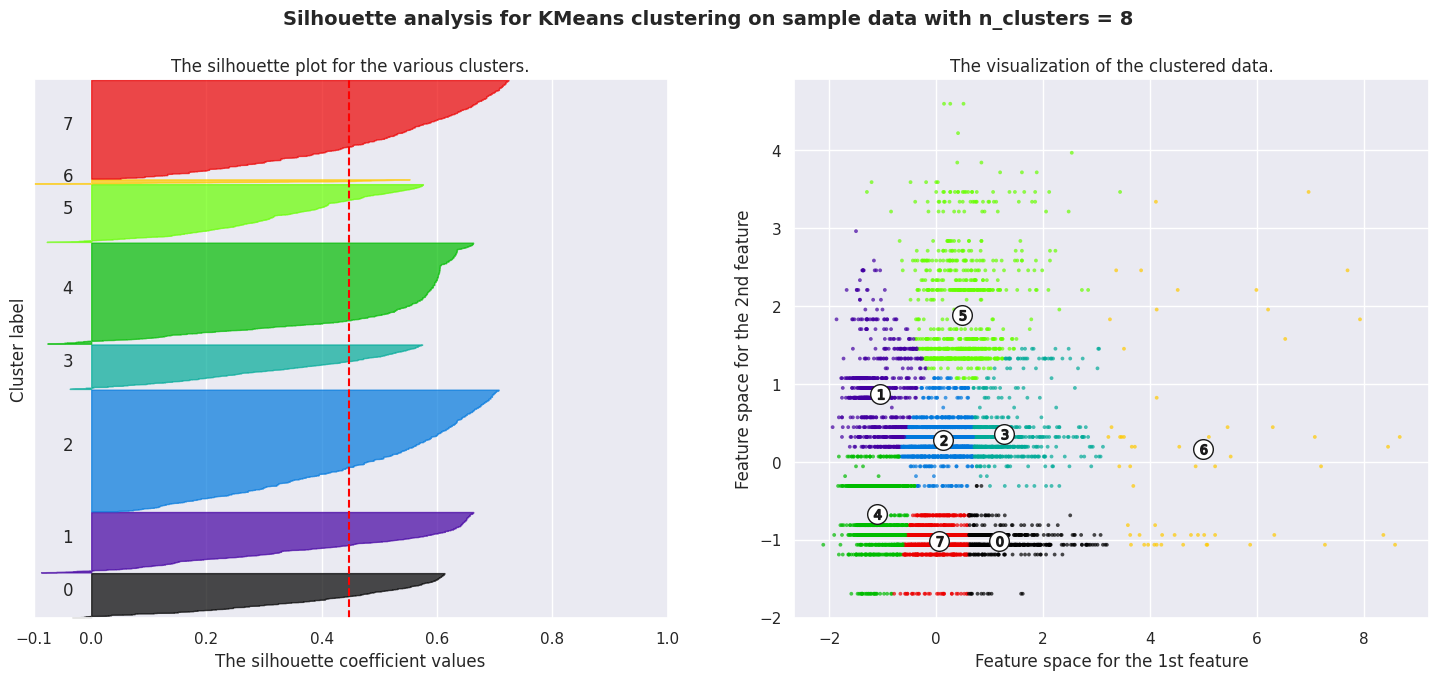

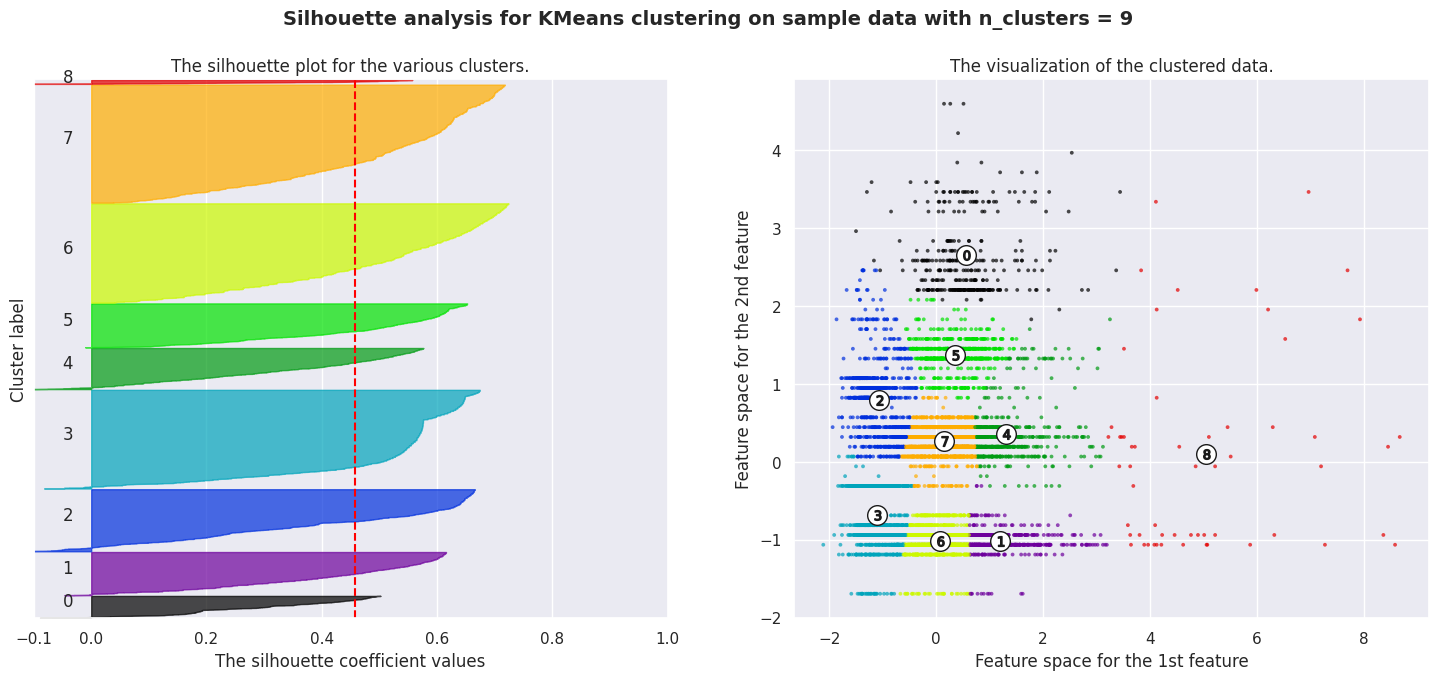

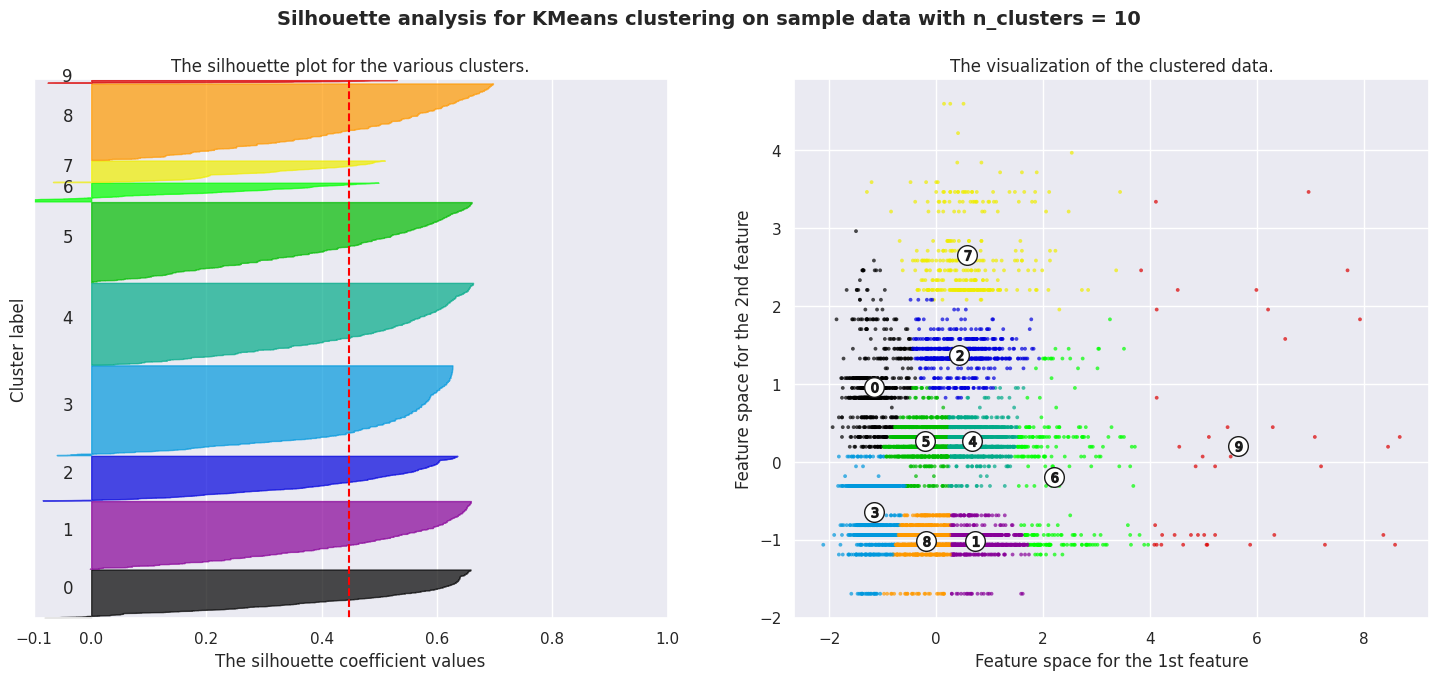

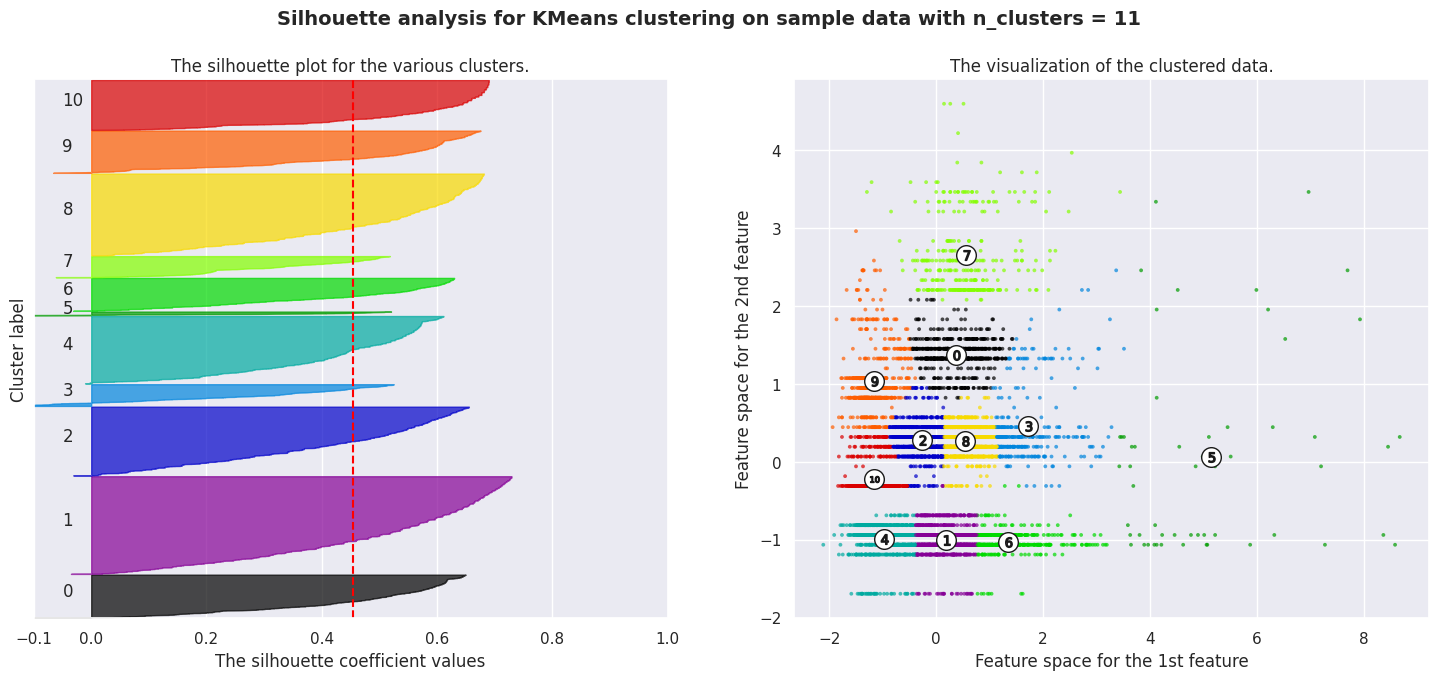

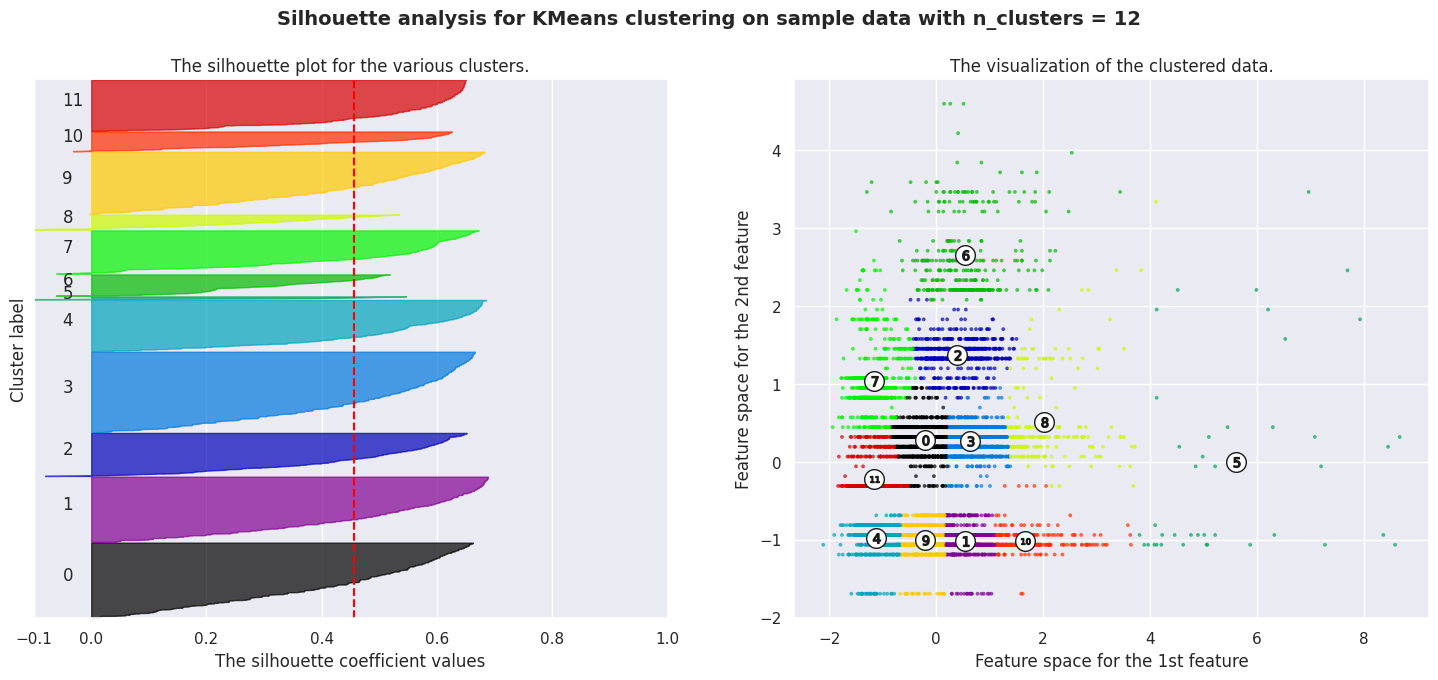

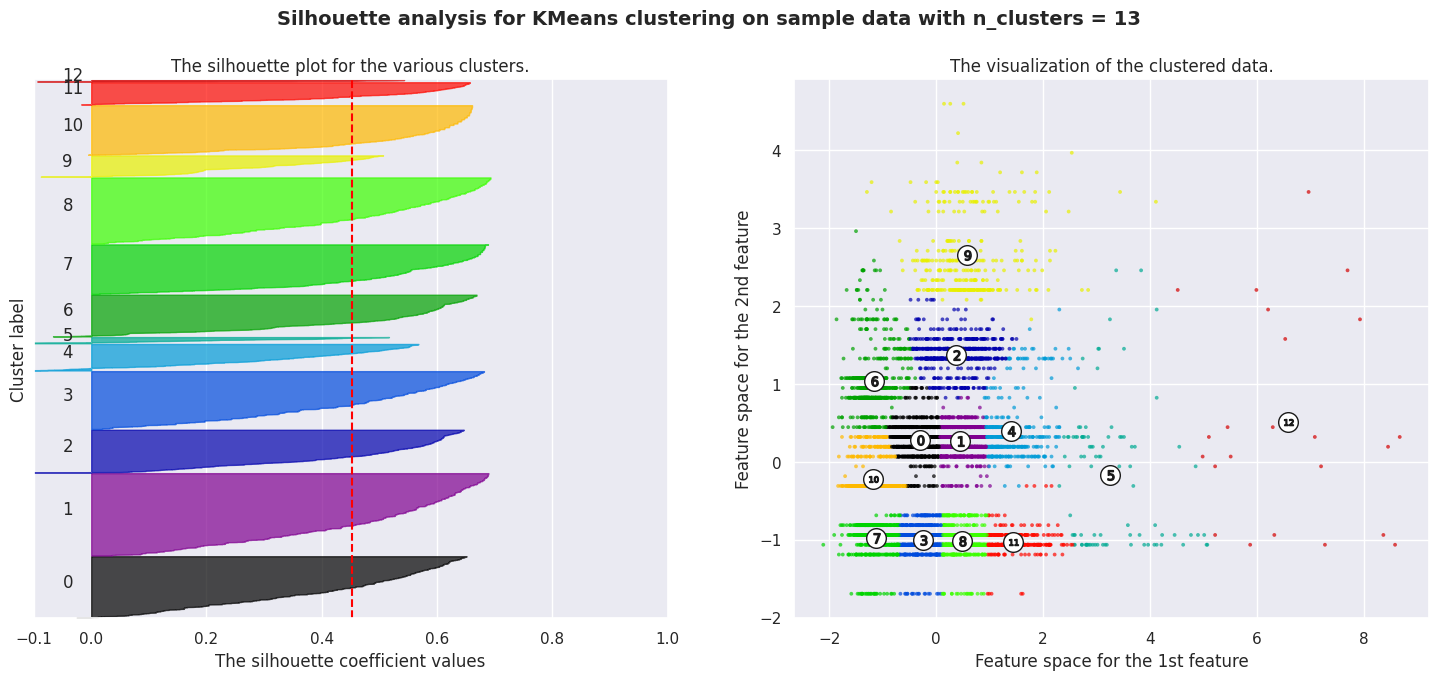

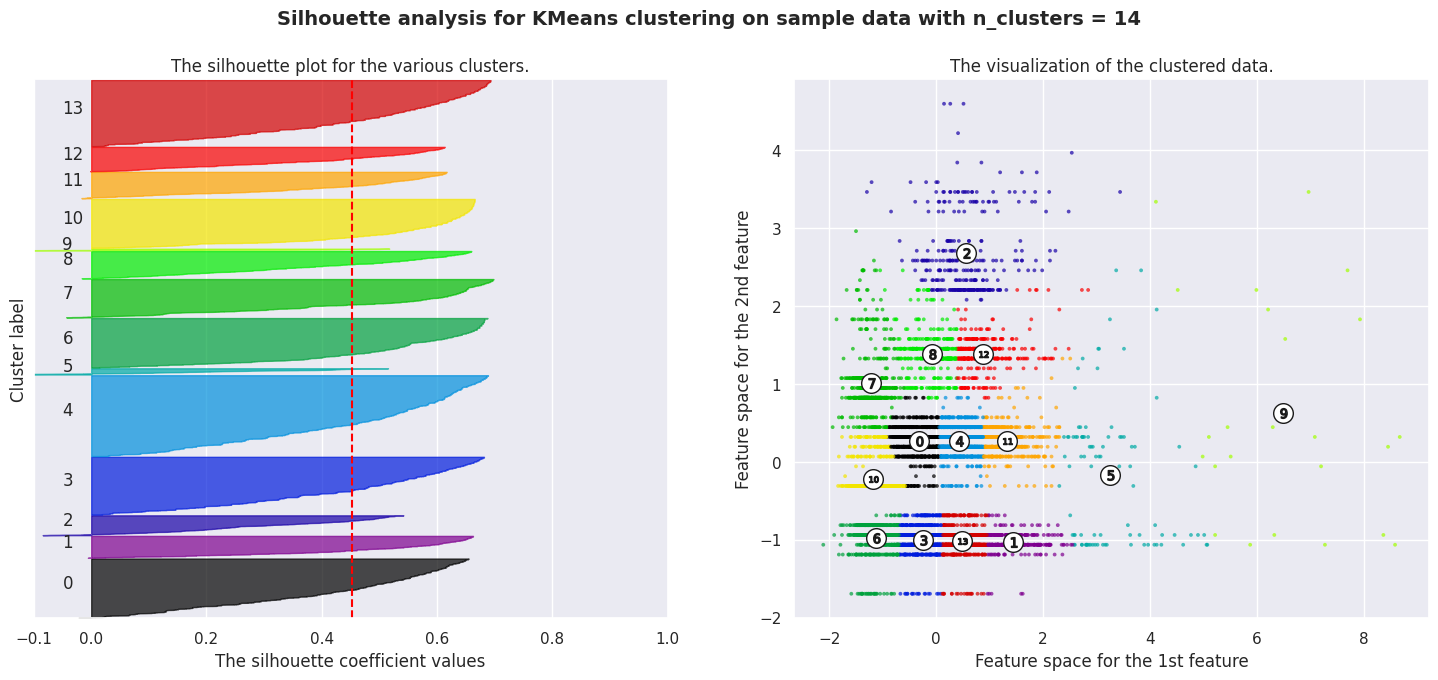

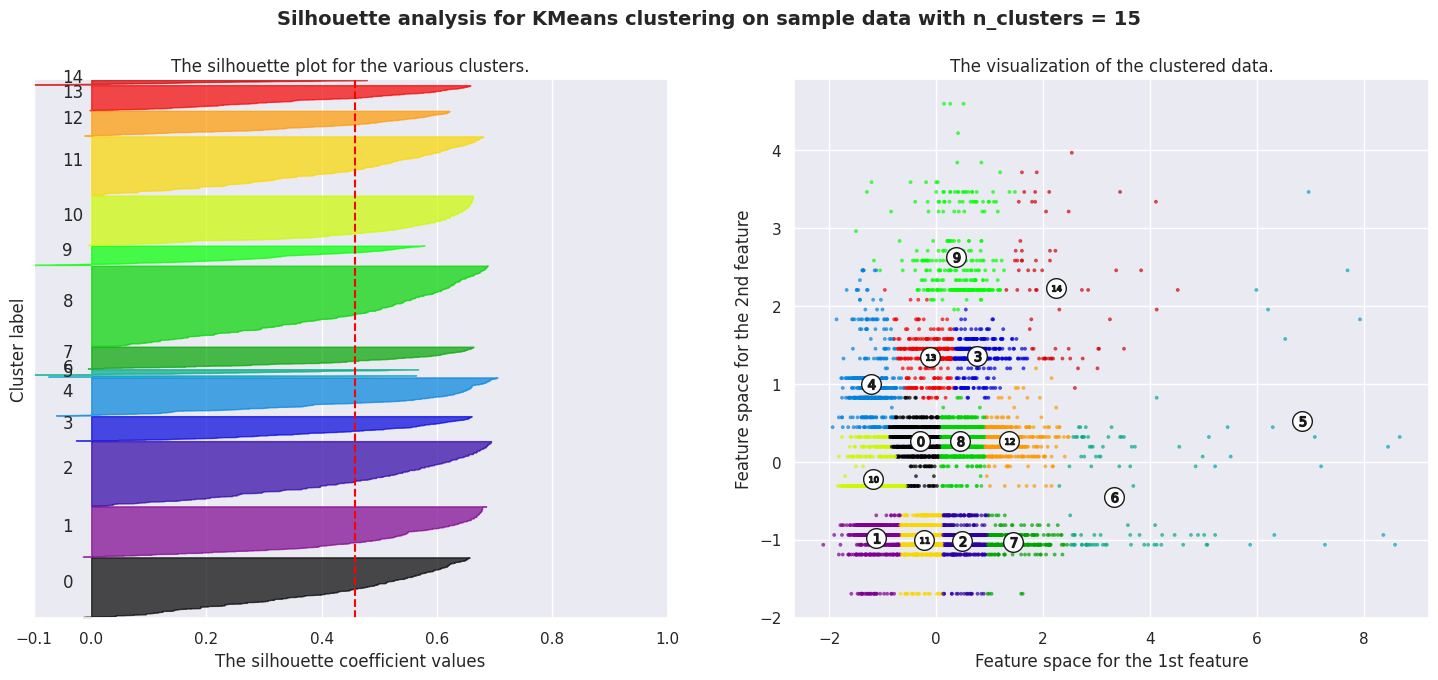

In [ ]:
# Visualizing evaluation Metric Score chart
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### ML Model - 2

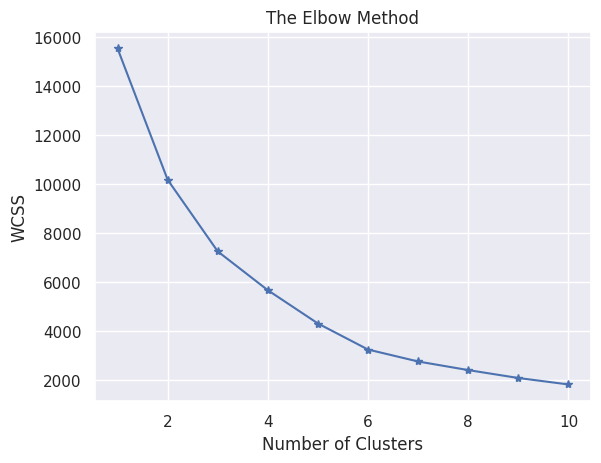

In [ ]:
# ML Model - 2 Implementation

# Fit the Algorithm
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=12)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#plotting elbow chart
plt.plot(range(1,11),wcss,marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
clusterer = KMeans(n_clusters=6, random_state=12)
cluster_lab = clusterer.fit_predict(X)
cluster_lab

array([2, 4, 0, ..., 1, 4, 1], dtype=int32)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

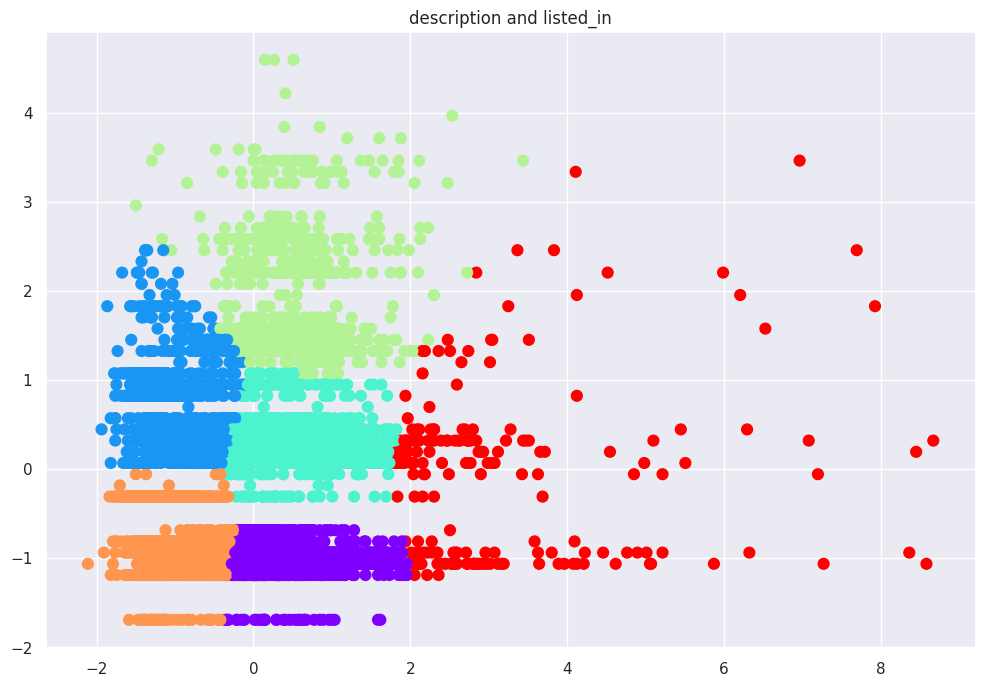

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(12,8))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=cluster_lab, s=60, cmap='rainbow')
centers = kmeans.cluster_centers_
# plt.scatter(centers[:6, 0], centers[:6, 1], c='blue', s=200, alpha=0.5)

### ML Model - 3

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# ML Model - 3 Implementation
db = DBSCAN(eps=0.5, min_samples=4).fit(X)                       # Fit the Algorithm
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)      #identifying the points which makes up our core points
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

#Calculating the number of clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

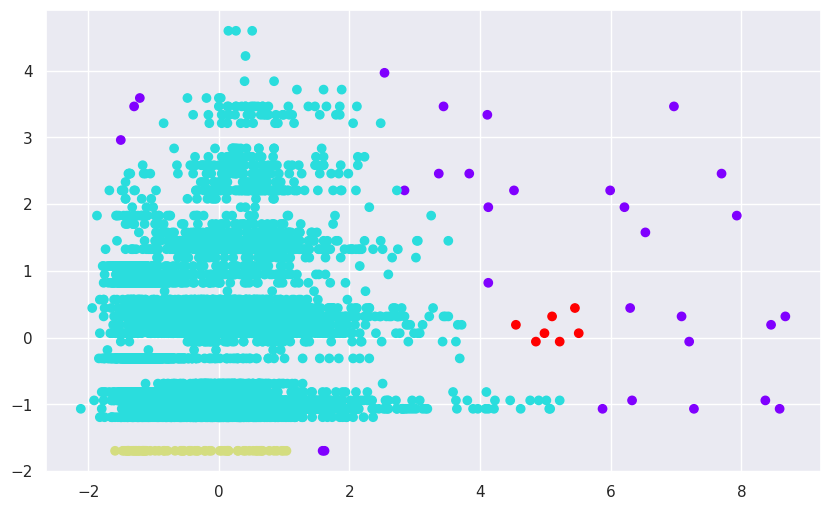

In [ ]:
# plotting the chart
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')

observation: DBSCAN algorithm identifies the dense region by grouping together data points that are close to eachother based on distance measurement. we observed that cluster is getting dense towards the centre, and is bit spreaded towards the extreme ends. Thus, it will not be suitable algorithm for clustering studies.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 Silhouette analysis can be used to study the separation distance between the resulting clusters and can be considered a better method compared to the Elbow method.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

- Thus K-means clustering will be best for this data set.
- K-means clustering shows that '5' will be optimum no of clusters with the silhoutte score of 0.457 And less negative values.

# **Recommendation System**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#defining new datframe for recommendation system
recommending_df = dfc.copy()

# #reseting index
recommending_df.reset_index(inplace=True)

In [ ]:
recommending_df.drop(columns=['index', 'show_id'], inplace=True)

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        , -0.97175333, -0.83646289, ...,  0.02758034,
        -0.93138358,  0.0905691 ],
       [-0.97175333,  1.        ,  0.94216854, ..., -0.26271039,
         0.81916222, -0.32303979],
       [-0.83646289,  0.94216854,  1.        , ..., -0.57088503,
         0.57956567, -0.62152898],
       ...,
       [ 0.02758034, -0.26271039, -0.57088503, ...,  1.        ,
         0.33821296,  0.99800925],
       [-0.93138358,  0.81916222,  0.57956567, ...,  0.33821296,
         1.        ,  0.27818861],
       [ 0.0905691 , -0.32303979, -0.62152898, ...,  0.99800925,
         0.27818861,  1.        ]])

In [ ]:
def recommend(movie):
  # to get the index of the movie liked by user
  index = recommending_df[recommending_df['title'] == movie].index[0]

  # to find similar movies
  similar_movies = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

  # to suggest similar movies
  for i in similar_movies[1:11]:
        print(recommending_df.iloc[i[0]].title)

In [ ]:
recommend('Ishqiya')

Don't Go Breaking My Heart 2
I Am not an Easy Man
Ishqiya
Midnight at the Magnolia
Running Shaadi
Well-Intended Love
72 Dangerous Animals: Latin America
Magical Andes
Kurt & Courtney
The Black Godfather


# **Conclusion**

- Netflix have ~70% of movies and 30% of TV_shows in 2019.
- Comedy is most popular genre in Netflix, across all content.
- Netflix focuses to add new content majorly towards end of current year and start of new year.
- A sudden drop was obserbed after 2020 in count of new content, Which is because of covid pandemic.
- India is on 2nd place as compared to content availability, maximum content is available for United states.
- There are almost ~30% of netflix original movies and ~50 % TV-shows.
- Content category and countries:
- Maximum adult content is from Spain.
- Maximum teen content is from India.
- Maximum older kids content is from Japan.
- Maximum kids content is from Canada.

All of this insights will be neccesary for business development and SWOT analysis.

Conclusion for clustering.

We tried 5 models for ML i.e.

- K-means clustering
- Elbow curve
- DBSCAN

  - K-means clustering shows that '6' will be optimum no of clusters with the silhoutte score of 0.468 with less negative values.

  - Thus K-means clustering will be best for this data set.

  - Cosine based recommender system was working really well.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***